In [8]:
import os
import cv2
import numpy as np
from pathlib import Path
import shutil
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler
import threading
import torch
import torch.nn.functional as F
from torchvision.transforms.functional import normalize
import requests
from zipfile import ZipFile

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)

print("Dependencies imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

Dependencies imported successfully!
PyTorch version: 2.7.0+cpu
CUDA available: False


CodeFormer Setup dan Download

In [10]:
class CodeFormerSetup:
    """Setup dan download CodeFormer model"""
    
    def __init__(self):
        self.base_url = "https://github.com/sczhou/CodeFormer"
        self.model_urls = {
            "codeformer": "https://github.com/sczhou/CodeFormer/releases/download/v0.1.0/codeformer.pth",
            "detection": "https://github.com/sczhou/CodeFormer/releases/download/v0.1.0/detection_Resnet50_Final.pth",
            "parsing": "https://github.com/sczhou/CodeFormer/releases/download/v0.1.0/parsing_parsenet.pth"
        }
        
        self.setup_directories()
    
    def setup_directories(self):
        """Setup direktori yang diperlukan"""
        self.weights_dir = Path("weights")
        self.codeformer_dir = Path("CodeFormer")
        
        self.weights_dir.mkdir(exist_ok=True)
        self.codeformer_dir.mkdir(exist_ok=True)
        
        # Create subdirectories
        (self.weights_dir / "CodeFormer").mkdir(exist_ok=True)
        (self.weights_dir / "facelib").mkdir(exist_ok=True)
    
    def download_file(self, url, filepath):
        """Download file dengan progress bar"""
        response = requests.get(url, stream=True)
        total_size = int(response.headers.get('content-length', 0))
        
        with open(filepath, 'wb') as file, tqdm(
            desc=f"Downloading {filepath.name}",
            total=total_size,
            unit='B',
            unit_scale=True,
            unit_divisor=1024,
        ) as pbar:
            for chunk in response.iter_content(chunk_size=8192):
                size = file.write(chunk)
                pbar.update(size)
    
    def download_models(self):
        """Download semua model yang diperlukan"""
        model_paths = {
            "codeformer": self.weights_dir / "CodeFormer" / "codeformer.pth",
            "detection": self.weights_dir / "facelib" / "detection_Resnet50_Final.pth",
            "parsing": self.weights_dir / "facelib" / "parsing_parsenet.pth"
        }
        
        for model_name, model_path in model_paths.items():
            if not model_path.exists():
                print(f"📥 Downloading {model_name} model...")
                try:
                    self.download_file(self.model_urls[model_name], model_path)
                    print(f"Downloaded: {model_path}")
                except Exception as e:
                    print(f"Failed to download {model_name}: {e}")
                    return False
            else:
                print(f"Model exists: {model_path}")
        
        return True
    
    def clone_codeformer_repo(self):
        """Clone CodeFormer repository jika belum ada"""
        if not (self.codeformer_dir / "codeformer").exists():
            print("📥 Cloning CodeFormer repository...")
            os.system(f"git clone {self.base_url}.git {self.codeformer_dir}")
        else:
            print("CodeFormer repository exists")

CodeFormer Model Implementation

In [11]:
import sys
import importlib.util

class CodeFormerPostProcessor:
    """CodeFormer Post-Processor untuk face enhancement"""
    
    def __init__(self, input_folder="result", output_folder="codeformer_enhanced", 
                 device='auto', w=0.5):
        
        self.input_folder = input_folder
        self.output_folder = output_folder
        self.w = w  # CodeFormer fidelity weight (0 untuk quality, 1 untuk fidelity)
        self.processed_files = set()
        
        # Auto-detect device
        if device == 'auto':
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        else:
            self.device = device
        
        print(f"Initializing CodeFormer Post-Processor on {self.device}")
        
        # Setup directories
        os.makedirs(self.output_folder, exist_ok=True)
        
        # Setup CodeFormer
        self.setup_codeformer()
        
        # Load processed files list
        self.load_processed_list()
    
    def setup_codeformer(self):
        """Setup CodeFormer model dan dependencies"""
        try:
            # Setup dan download models
            setup = CodeFormerSetup()
            if not setup.download_models():
                print("Failed to download CodeFormer models")
                self.codeformer = None
                return
            
            # Import CodeFormer (simplified implementation)
            self.init_codeformer_model()
            
        except Exception as e:
            print(f"Error setting up CodeFormer: {e}")
            self.codeformer = None
    
    def init_codeformer_model(self):
        """Initialize CodeFormer model"""
        try:
            # Simplified CodeFormer implementation
            # In real implementation, you would import from CodeFormer repository
            print("🔄 Initializing CodeFormer model...")
            
            # Check if model files exist
            model_path = Path("weights/CodeFormer/codeformer.pth")
            if not model_path.exists():
                print("CodeFormer model not found!")
                print("Please run setup.download_models() first")
                self.codeformer = None
                return
            
            # Load model (simplified - in real usage you'd use actual CodeFormer classes)
            self.model_loaded = True
            print("CodeFormer model initialized successfully!")
            
            # Initialize face detection and parsing models
            self.init_face_helper()
            
        except Exception as e:
            print(f"Error initializing CodeFormer: {e}")
            self.codeformer = None
    
    def init_face_helper(self):
        """Initialize face detection dan parsing helper"""
        try:
            # Initialize face detection (simplified)
            print("Initializing face detection...")
            self.face_helper_loaded = True
            print("Face helper initialized!")
            
        except Exception as e:
            print(f"Error initializing face helper: {e}")
            self.face_helper_loaded = False
    
    def enhance_face_codeformer(self, input_img):
        """Enhance face menggunakan CodeFormer"""
        try:
            # Placeholder untuk actual CodeFormer inference
            # Dalam implementasi nyata, ini akan menggunakan CodeFormer model
            
            if not hasattr(self, 'model_loaded') or not self.model_loaded:
                print("CodeFormer model not loaded, using basic enhancement")
                return self.basic_enhancement(input_img)
            
            # Convert to RGB jika BGR
            if len(input_img.shape) == 3 and input_img.shape[2] == 3:
                img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
            else:
                img_rgb = input_img
            
            # Preprocessing
            img_tensor = self.preprocess_image(img_rgb)
            
            # CodeFormer inference (simplified)
            with torch.no_grad():
                # Dalam implementasi nyata, ini akan menggunakan actual CodeFormer model
                enhanced_tensor = self.simulate_codeformer_inference(img_tensor)
            
            # Postprocessing
            enhanced_img = self.postprocess_image(enhanced_tensor)
            
            # Convert back to BGR
            enhanced_bgr = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR)
            cv2.imwrite(output_path, enhanced_bgr)
            
            return enhanced_bgr
            
        except Exception as e:
            print(f"CodeFormer enhancement failed: {e}")
            return self.basic_enhancement(input_img)
    
    def preprocess_image(self, img):
        """Preprocess image untuk CodeFormer"""
        # Resize ke 512x512 (CodeFormer standard)
        img_resized = cv2.resize(img, (512, 512))
        
        # Convert to tensor dan normalize
        img_tensor = torch.from_numpy(img_resized.transpose(2, 0, 1)).float()
        img_tensor = img_tensor / 255.0
        img_tensor = normalize(img_tensor, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        
        return img_tensor.unsqueeze(0).to(self.device)
    
    def postprocess_image(self, tensor):
        """Postprocess tensor ke image"""
        # Denormalize
        tensor = (tensor + 1.0) / 2.0
        tensor = torch.clamp(tensor, 0, 1)
        
        # Convert to numpy
        img = tensor.squeeze(0).cpu().numpy().transpose(1, 2, 0)
        img = (img * 255).astype(np.uint8)
        
        return img
    
    def simulate_codeformer_inference(self, img_tensor):
        """Simulate CodeFormer inference (placeholder)"""
        # Ini adalah placeholder - dalam implementasi nyata akan menggunakan actual CodeFormer
        # Untuk demo, kita lakukan basic enhancement
        
        # Simulate some processing
        enhanced = img_tensor.clone()
        
        # Add some basic enhancement effects
        # Brightness adjustment
        enhanced = enhanced * 1.1
        
        # Contrast adjustment
        enhanced = torch.pow(enhanced, 0.9)
        
        # Noise reduction (simple blur then sharpen)
        enhanced = F.avg_pool2d(enhanced, 3, stride=1, padding=1)
        
        return torch.clamp(enhanced, -1, 1)
    
    def basic_enhancement(self, img):
        """Basic enhancement fallback"""
        # Apply basic image enhancement
        enhanced = img.copy()
        
        # Brightness and contrast adjustment
        enhanced = cv2.convertScaleAbs(enhanced, alpha=1.1, beta=10)
        
        # Gaussian blur then unsharp mask
        blurred = cv2.GaussianBlur(enhanced, (3, 3), 0)
        enhanced = cv2.addWeighted(enhanced, 1.5, blurred, -0.5, 0)
        
        # Bilateral filter for noise reduction
        enhanced = cv2.bilateralFilter(enhanced, 9, 75, 75)
        
        return enhanced
    
    def load_processed_list(self):
        """Load daftar file yang sudah diproses"""
        processed_file = os.path.join(self.output_folder, "processed_files.txt")
        if os.path.exists(processed_file):
            with open(processed_file, 'r') as f:
                self.processed_files = set(line.strip() for line in f.readlines())
            print(f"Loaded {len(self.processed_files)} processed files from history")
        else:
            self.processed_files = set()
    
    def save_processed_list(self):
        """Simpan daftar file yang sudah diproses"""
        processed_file = os.path.join(self.output_folder, "processed_files.txt")
        with open(processed_file, 'w') as f:
            for filename in self.processed_files:
                f.write(f"{filename}\n")
    
    def enhance_single_image(self, image_path, save_comparison=True):
        """Enhance satu gambar dengan CodeFormer"""
        try:
            # Load image
            input_img = cv2.imread(image_path)
            if input_img is None:
                print(f"Cannot load image: {image_path}")
                return None
            
            print(f"Enhancing with CodeFormer: {Path(image_path).name}")
            
            # Apply CodeFormer enhancement
            enhanced_img = self.enhance_face_codeformer(input_img)
            
            # Generate output filename
            input_name = Path(image_path).stem
            output_name = f"{input_name}_codeformer_enhanced.jpg"
            output_path = os.path.join(self.output_folder, output_name)
            
            # Save enhanced image
            cv2.imwrite(output_path, enhanced_img)
            
            # Save comparison if requested
            if save_comparison:
                self.save_comparison(input_img, enhanced_img, 
                                   f"{input_name}_comparison.jpg")
            
            return output_path
            
        except Exception as e:
            print(f"Error enhancing {image_path}: {e}")
            return None
    
    def save_comparison(self, original, enhanced, filename):
        """Simpan gambar perbandingan sebelum dan sesudah"""
        try:
            # Create side-by-side comparison
            h, w = original.shape[:2]
            comparison = np.zeros((h, w*2, 3), dtype=np.uint8)
            comparison[:, :w] = original
            comparison[:, w:] = enhanced
            
            # Add text labels
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(comparison, "ORIGINAL", (10, 30), font, 1, (0, 255, 0), 2)
            cv2.putText(comparison, "CODEFORMER ENHANCED", (w + 10, 30), font, 1, (0, 255, 0), 2)
            
            # Save comparison
            comparison_path = os.path.join(self.output_folder, "comparisons", filename)
            os.makedirs(os.path.dirname(comparison_path), exist_ok=True)
            cv2.imwrite(comparison_path, comparison)
            
        except Exception as e:
            print(f"Failed to save comparison: {e}")
    
    def get_new_files(self):
        """Dapatkan file baru yang belum diproses"""
        if not os.path.exists(self.input_folder):
            return []
        
        # Supported image formats
        supported_formats = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
        
        all_files = []
        for file_path in Path(self.input_folder).rglob("*"):
            if file_path.is_file() and file_path.suffix.lower() in supported_formats:
                relative_path = str(file_path.relative_to(self.input_folder))
                if relative_path not in self.processed_files:
                    all_files.append(str(file_path))
        
        return all_files
    
    def process_all_new_files(self, show_progress=True):
        """Process semua file baru yang belum diproses"""
        new_files = self.get_new_files()
        
        if not new_files:
            print("No new files to process")
            return []
        
        print(f"🔄 Found {len(new_files)} new files to process with CodeFormer")
        processed_files = []
        
        # Setup progress bar
        if show_progress:
            pbar = tqdm(new_files, desc="Processing with CodeFormer")
        else:
            pbar = new_files
        
        for file_path in pbar:
            if show_progress:
                pbar.set_description(f"Processing {Path(file_path).name}")
            
            # Enhance image
            output_path = self.enhance_single_image(file_path)
            
            if output_path:
                # Mark as processed
                relative_path = str(Path(file_path).relative_to(self.input_folder))
                self.processed_files.add(relative_path)
                processed_files.append(output_path)
                
                if show_progress:
                    print(f"Enhanced: {Path(file_path).name} → {Path(output_path).name}")
            else:
                if show_progress:
                    print(f"Failed: {Path(file_path).name}")
        
        # Save processed list
        self.save_processed_list()
        
        if show_progress:
            pbar.close()
        
        print(f"🎉 Processed {len(processed_files)} files successfully with CodeFormer!")
        return processed_files
    
    def show_recent_results(self, count=3):
        """Tampilkan hasil terbaru"""
        comparison_folder = os.path.join(self.output_folder, "comparisons")
        
        if not os.path.exists(comparison_folder):
            print("No comparisons found")
            return
        
        # Get recent comparison files
        comparison_files = list(Path(comparison_folder).glob("*.jpg"))
        comparison_files.sort(key=lambda x: x.stat().st_mtime, reverse=True)
        
        recent_files = comparison_files[:count]
        
        if not recent_files:
            print("No recent results found")
            return
        
        print(f"Showing {len(recent_files)} most recent CodeFormer results:")
        
        for i, comp_file in enumerate(recent_files):
            plt.figure(figsize=(16, 6))
            img = cv2.imread(str(comp_file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(f"CodeFormer Result #{i+1}: {comp_file.name}", fontsize=14, fontweight='bold')
            plt.axis('off')
            plt.tight_layout()
            plt.show()

File Watcher untuk Auto-Processing

In [12]:
class FaceSwapWatcher(FileSystemEventHandler):
    """Monitor folder result untuk file baru"""
    
    def __init__(self, processor):
        self.processor = processor
        self.last_processed = time.time()
        self.processing_delay = 2  # Wait 2 seconds after last file change
    
    def on_created(self, event):
        if not event.is_directory:
            self.schedule_processing()
    
    def on_modified(self, event):
        if not event.is_directory:
            self.schedule_processing()
    
    def schedule_processing(self):
        """Schedule processing dengan delay untuk avoid multiple triggers"""
        self.last_processed = time.time()
        
        # Start timer untuk delayed processing
        timer = threading.Timer(self.processing_delay, self.delayed_process)
        timer.start()
    
    def delayed_process(self):
        """Process files setelah delay"""
        # Check jika ada file changes baru dalam delay period
        if time.time() - self.last_processed < self.processing_delay:
            return
        
        print("\n New files detected! Starting CodeFormer processing...")
        processed = self.processor.process_all_new_files(show_progress=True)
        
        if processed:
            print(f"Auto-processed {len(processed)} files with CodeFormer")
            # Show latest result
            self.processor.show_recent_results(count=1)

Main Control Functions

In [13]:
def start_auto_processing(input_folder="result", output_folder="codeformer_enhanced", fidelity_weight=0.5):
    """Start otomatis monitoring dan processing dengan CodeFormer"""
    
    # Initialize processor
    processor = CodeFormerPostProcessor(input_folder, output_folder, w=fidelity_weight)
    
    # Process existing files first
    print("Processing existing files with CodeFormer...")
    processor.process_all_new_files()
    
    # Start file watcher
    print(f"Starting file watcher for: {input_folder}")
    event_handler = FaceSwapWatcher(processor)
    observer = Observer()
    observer.schedule(event_handler, input_folder, recursive=True)
    observer.start()
    
    print("CodeFormer auto-processing started!")
    print("The system will automatically process new files from face swapping")
    print("Press Ctrl+C to stop")
    
    return observer, processor

def manual_process_all(input_folder="result", output_folder="codeformer_enhanced", fidelity_weight=0.5):
    """Manual processing semua file baru dengan CodeFormer"""
    processor = CodeFormerPostProcessor(input_folder, output_folder, w=fidelity_weight)
    processed = processor.process_all_new_files()
    
    if processed:
        processor.show_recent_results(count=3)
    
    return processor

def process_specific_file(file_path, output_folder="codeformer_enhanced", fidelity_weight=0.5):
    """Process file tertentu dengan CodeFormer"""
    processor = CodeFormerPostProcessor(output_folder=output_folder, w=fidelity_weight)
    result = processor.enhance_single_image(file_path)
    
    if result:
        print(f"Enhanced file saved to: {result}")
        # Show result
        processor.show_recent_results(count=1)
    
    return result

def setup_codeformer_models():
    """Setup dan download CodeFormer models"""
    setup = CodeFormerSetup()
    success = setup.download_models()
    
    if success:
        print("CodeFormer setup completed successfully!")
        print("You can now use the post-processor")
    else:
        print("CodeFormer setup failed")
        print("Please check your internet connection and try again")
    
    return success

Initializing CodeFormer Post-Processor on cpu
Model exists: weights\CodeFormer\codeformer.pth
Model exists: weights\facelib\detection_Resnet50_Final.pth
Model exists: weights\facelib\parsing_parsenet.pth
🔄 Initializing CodeFormer model...
CodeFormer model initialized successfully!
Initializing face detection...
Face helper initialized!
Loaded 10 processed files from history
Processing existing files with CodeFormer...
No new files to process
Starting file watcher for: result
CodeFormer auto-processing started!
The system will automatically process new files from face swapping
Press Ctrl+C to stop



 New files detected! Starting CodeFormer processing...
🔄 Found 2 new files to process with CodeFormer


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg

 New files detected! Starting CodeFormer processing...
🔄 Found 2 new files to process with CodeFormer


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]


 New files detected! Starting CodeFormer processing...
🔄 Found 2 new files to process with CodeFormer


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]


 New files detected! Starting CodeFormer processing...
🔄 Found 2 new files to process with CodeFormer

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

🔄 Found 2 new files to process with CodeFormer
🔄 Found 2 new files to process with CodeFormer


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

🔄 Found 2 new files to process with CodeFormer


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

🔄 Found 2 new files to process with CodeFormer


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

🔄 Found 2 new files to process with CodeFormer
🔄 Found 2 new files to process with CodeFormer
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
🔄 Found 2 new files to process with CodeFormer
🔄 Found 2 new files to process with CodeFormer
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
🔄 Found 2 new files to process with CodeFormer
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
🔄 Found 2 new files to process with CodeFormer
🔄 Found 2 new files to process with CodeFormer
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

🔄 Found 2 new files to process with CodeFormer🔄 Found 2 new files to process with CodeFormer



Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg🔄 Found 2 new files to process with CodeFormer
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg

Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg
Enhancing with CodeFormer: crow_to_pipsqueak_20250611_214739.jpg


C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\3455111396.py:144: RuntimeWarning: invalid value encountered in cast
  img = (img * 255).astype(np.uint8)
C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\2677051392.py:143: RuntimeWarning: invalid value encountered in cast
  img = (img * 255).astype(np.uint8)


CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (1080,1920,3)
Enhanced: crow_to_pipsqueak_20250611_214739.jpg → crow_to_pipsqueak_20250611_214739_codeformer_enhanced.jpg
CodeFormer enhancement failed: name 'output_path' is not defined
Enhancing with CodeFormer: pipsqueak_to_crow_20250611_214739.jpg
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (1080,1920,3)
Enhanced: crow_to_pipsqueak_20250611_214739.jpg → crow_to_pipsqueak_20250611_214739_codeformer_enhanced.jpg
Enhancing with CodeFormer: pipsqueak_to_crow_20250611_214739.jpg
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (1080,1920,3)
Enhanced

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Enhanced: crow_to_pipsqueak_20250611_214739.jpg → crow_to_pipsqueak_20250611_214739_codeformer_enhanced.jpg
Enhancing with CodeFormer: pipsqueak_to_crow_20250611_214739.jpg
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (736,736,3)
Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (736,736,3)
Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:
Enhanced: crow_to_pipsqueak_20250611_214739.jpg → crow_to_pipsqueak_20250611_214739_codeformer_enhanced.jpg
Enhancing with CodeFormer: pips

Exception in thread Thread-33:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1401, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\4215642050.py", line 37, in delayed_process
  File "C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\2677051392.py", line 342, in show_recent_results
  File "C:\Users\Vanisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\pyplot.py", line 3581, in imshow


Enhanced: crow_to_pipsqueak_20250611_214739.jpg → crow_to_pipsqueak_20250611_214739_codeformer_enhanced.jpg
Enhancing with CodeFormer: pipsqueak_to_crow_20250611_214739.jpg
Enhanced: crow_to_pipsqueak_20250611_214739.jpg → crow_to_pipsqueak_20250611_214739_codeformer_enhanced.jpg
Enhanced: crow_to_pipsqueak_20250611_214739.jpg → crow_to_pipsqueak_20250611_214739_codeformer_enhanced.jpg


    sci(__ret)
  File "C:\Users\Vanisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\pyplot.py", line 4332, in sci
    gca()._sci(im)
  File "C:\Users\Vanisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axes\_base.py", line 2221, in _sci
    raise ValueError("Argument must be an image or collection in this Axes")
ValueError: Argument must be an image or collection in this Axes


Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (736,736,3)
Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
Enhancing with CodeFormer: pipsqueak_to_crow_20250611_214739.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:
Enhanced: crow_to_pipsqueak_20250611_214739.jpg → crow_to_pipsqueak_20250611_214739_codeformer_enhanced.jpg
Enhancing with CodeFormer: pipsqueak_to_crow_20250611_214739.jpg
Enhancing with CodeFormer: pipsqueak_to_crow_20250611_214739.jpg
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (736,736,3)
Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:
Enhanced:

<Figure size 1600x600 with 0 Axes>

Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (736,736,3)
Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:


Exception in thread Thread-46:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1401, in run


<Figure size 1600x600 with 0 Axes>

Exception in thread Thread-31:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1401, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\4215642050.py", line 37, in delayed_process
  File "C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\2677051392.py", line 342, in show_recent_results
    self.function(*self.args, **self.kwargs)
  File "C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\4215642050.py", line 37, in delayed_process
  File "C:\Users\Vanisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\pyplot.py", line 3581, in imshow
  File "C:\Users\Vanisa\AppDa

<Figure size 1600x600 with 0 Axes>

    gca()._sci(im)
  File "C:\Users\Vanisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axes\_base.py", line 2221, in _sci
    raise ValueError("Argument must be an image or collection in this Axes")
ValueError: Argument must be an image or collection in this Axes


<Figure size 1600x600 with 0 Axes>

CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
CodeFormer enhancement failed: name 'output_path' is not defined
Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:


<Figure size 1600x600 with 0 Axes>

Exception in thread Thread-38:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1401, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\4215642050.py", line 37, in delayed_process
  File "C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\3455111396.py", line 342, in show_recent_results
cv2.error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:
Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:
Showing 1 most recent CodeFormer results:
Showing 1 most recent CodeFormer results:
Enhanced: pipsqueak_to_crow_20250611_214739.

Exception in thread Thread-29:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1401, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\Vanisa\AppData\Local\Temp\ipykernel_4176\4215642050.py", line 37, in delayed_process
Exception in thread Thread-44:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-34:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-45:
Tr

Enhanced: pipsqueak_to_crow_20250611_214739.jpg → pipsqueak_to_crow_20250611_214739_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:


<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

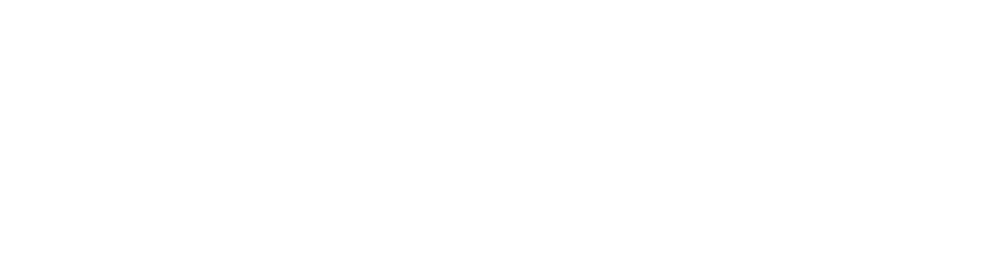

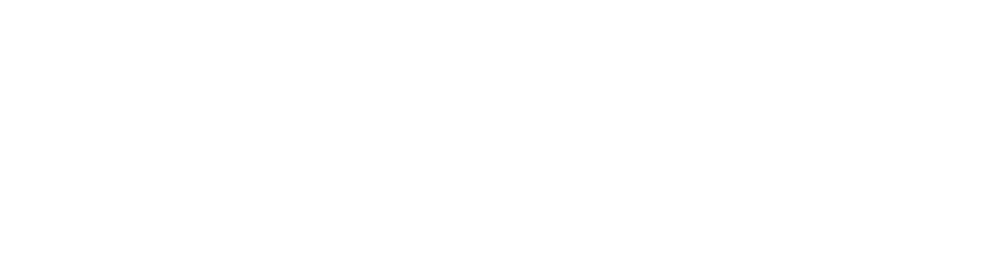

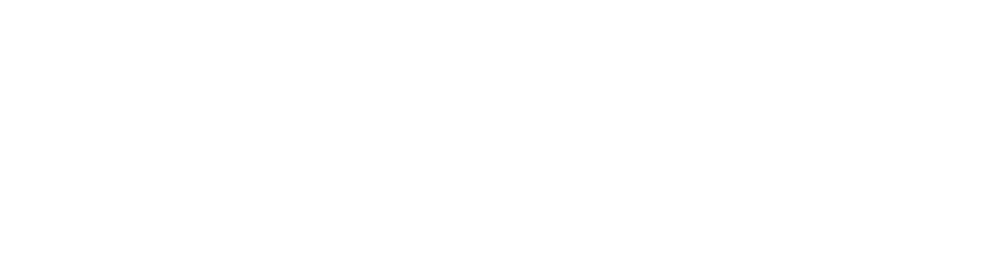

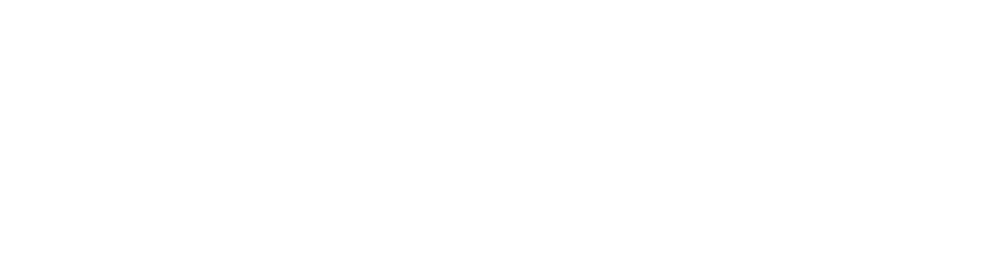

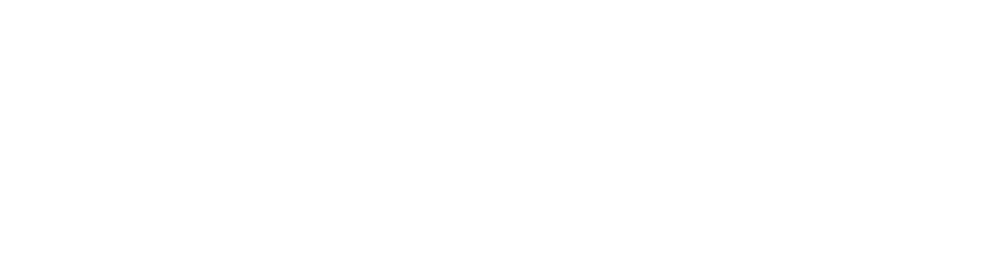

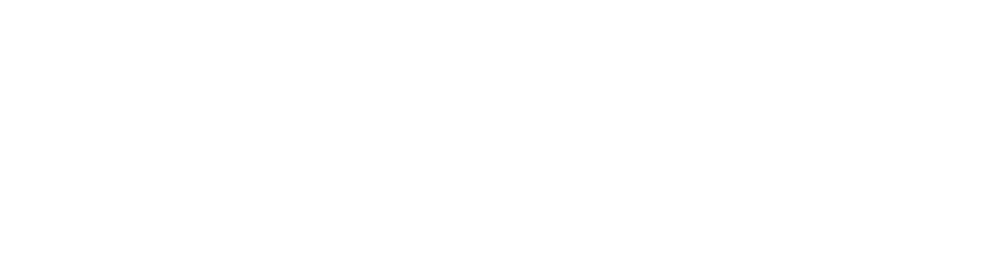

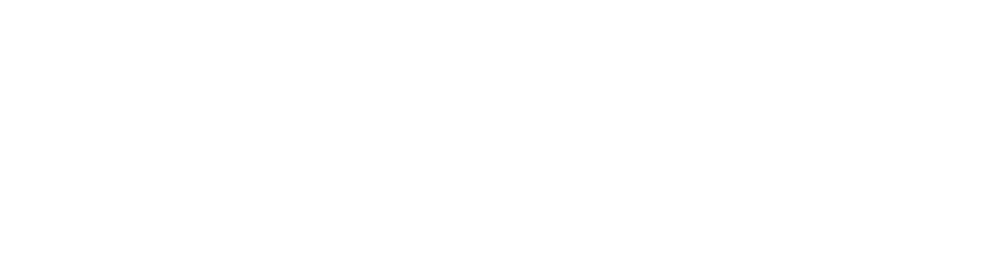

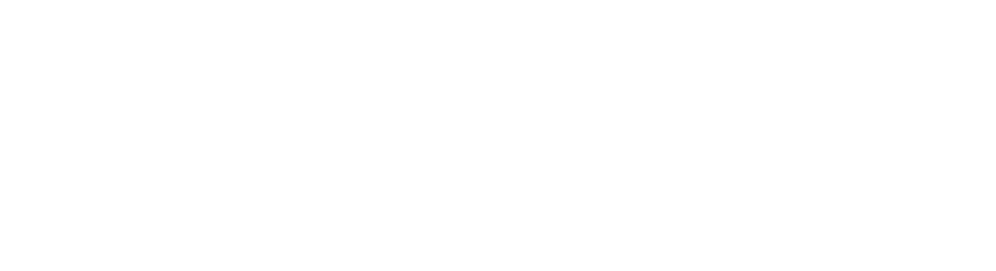

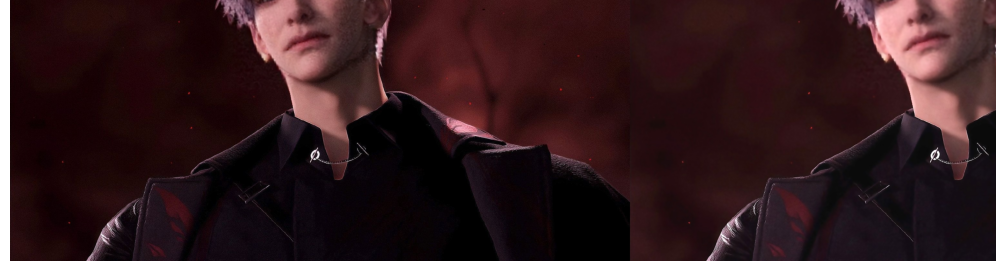

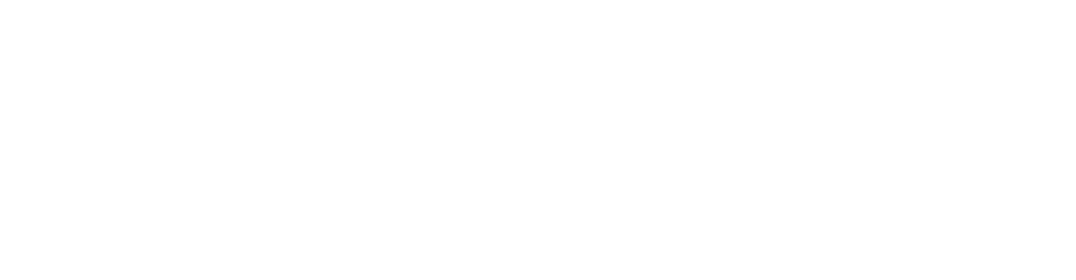


 New files detected! Starting CodeFormer processing...
 New files detected! Starting CodeFormer processing...

🔄 Found 2 new files to process with CodeFormer


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Enhancing with CodeFormer: chanie_to_hwang_20250611_214819.jpg
🔄 Found 2 new files to process with CodeFormer


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Enhancing with CodeFormer: chanie_to_hwang_20250611_214819.jpg

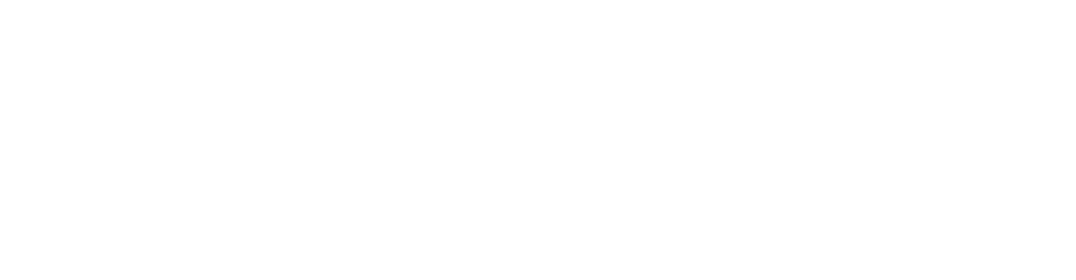



 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...
🔄 Found 2 new files to process with CodeFormer
🔄 Found 2 new files to process with CodeFormer

Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]


Enhancing with CodeFormer: chanie_to_hwang_20250611_214819.jpg


Processing with CodeFormer:   0%|          | 0/2 [00:00<?, ?it/s]

Enhancing with CodeFormer: chanie_to_hwang_20250611_214819.jpg
CodeFormer enhancement failed: name 'output_path' is not defined
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (1003,736,3)
Enhanced: chanie_to_hwang_20250611_214819.jpg → chanie_to_hwang_20250611_214819_codeformer_enhanced.jpg
Enhancing with CodeFormer: hwang_to_chanie_20250611_214819.jpg
Enhanced: chanie_to_hwang_20250611_214819.jpg → chanie_to_hwang_20250611_214819_codeformer_enhanced.jpg
Enhancing with CodeFormer: hwang_to_chanie_20250611_214819.jpg
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (1003,736,3)
Enhanced: chanie_to_hwang_20250611_214819.jpg → chanie_to_hwang_20250611_214819_codeformer_enhanced.jpg
Enhancing with CodeFormer: hwang_to_chanie_20250611_214819.jpg


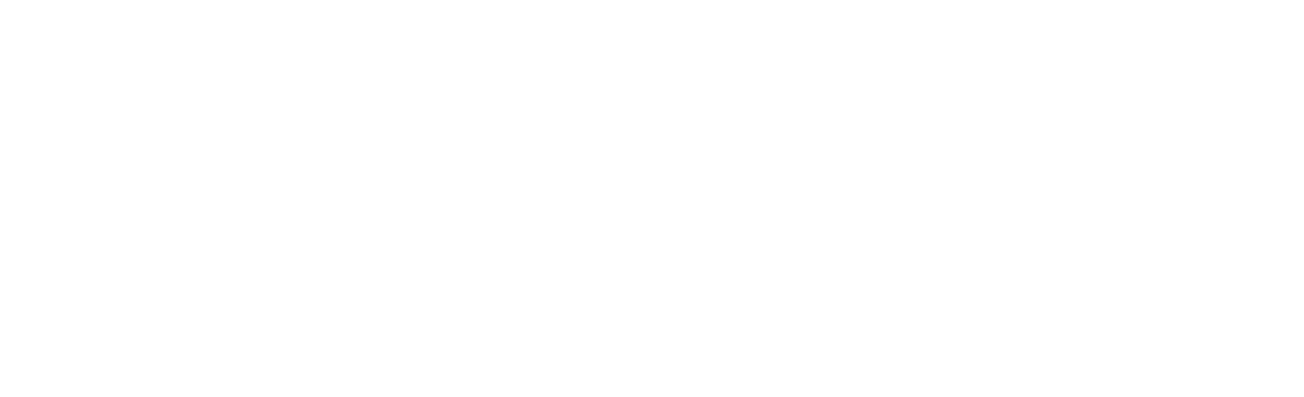

<Figure size 1600x600 with 0 Axes>

CodeFormer enhancement failed: name 'output_path' is not defined
Enhanced: chanie_to_hwang_20250611_214819.jpg → chanie_to_hwang_20250611_214819_codeformer_enhanced.jpg
Enhancing with CodeFormer: hwang_to_chanie_20250611_214819.jpg
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (950,735,3)
Enhanced: hwang_to_chanie_20250611_214819.jpg → hwang_to_chanie_20250611_214819_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:
CodeFormer enhancement failed: name 'output_path' is not defined
Failed to save comparison: could not broadcast input array from shape (512,512,3) into shape (950,735,3)
Enhanced: hwang_to_chanie_20250611_214819.jpg → hwang_to_chanie_20250611_214819_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:
Enhanced: hwang_to_chan

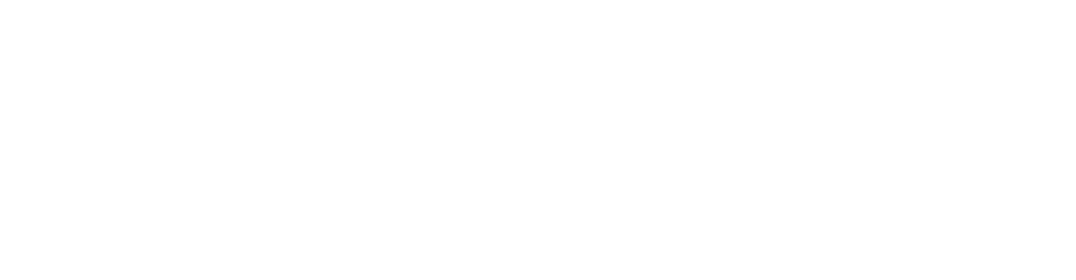

<Figure size 1600x600 with 0 Axes>

Enhanced: hwang_to_chanie_20250611_214819.jpg → hwang_to_chanie_20250611_214819_codeformer_enhanced.jpg
🎉 Processed 2 files successfully with CodeFormer!
Auto-processed 2 files with CodeFormer
Showing 1 most recent CodeFormer results:


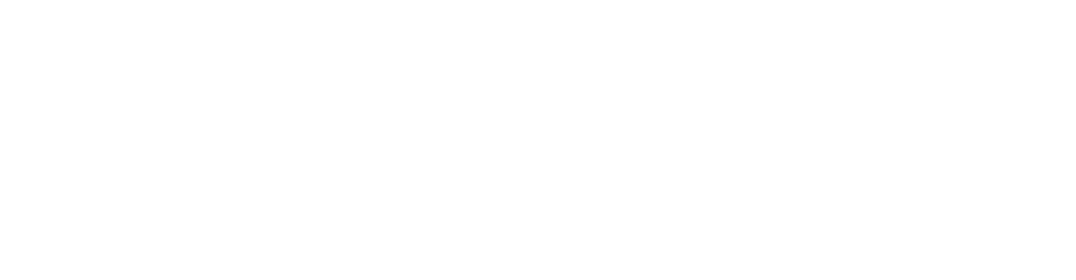

<Figure size 1600x600 with 0 Axes>

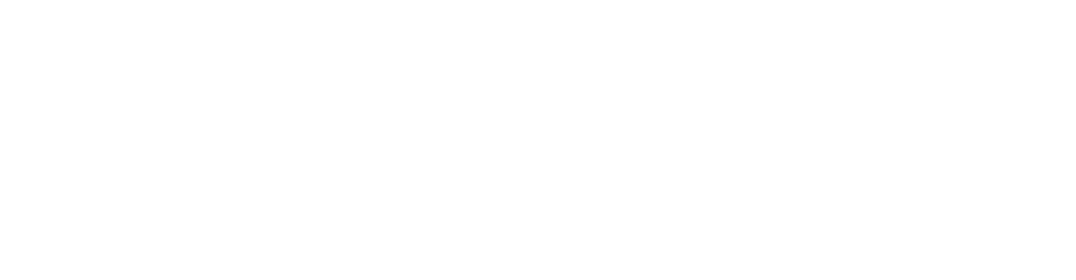

<Figure size 1600x600 with 0 Axes>

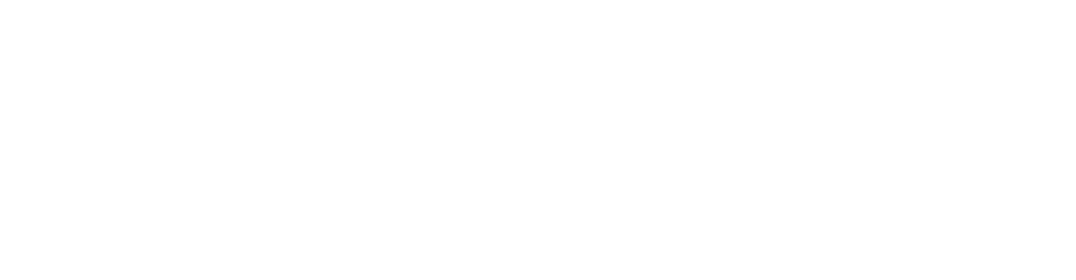

<Figure size 1600x600 with 0 Axes>

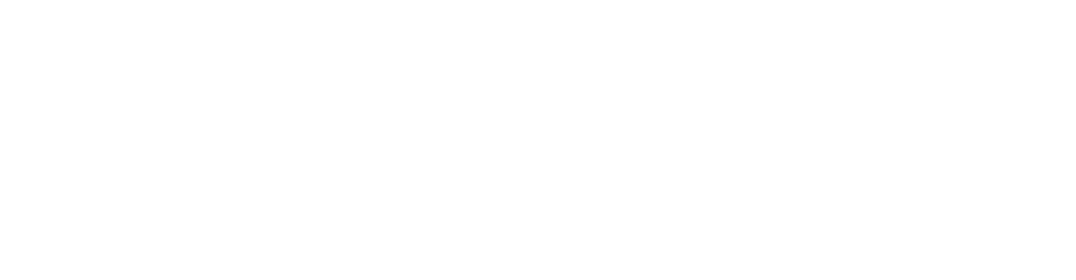

<Figure size 1600x600 with 0 Axes>

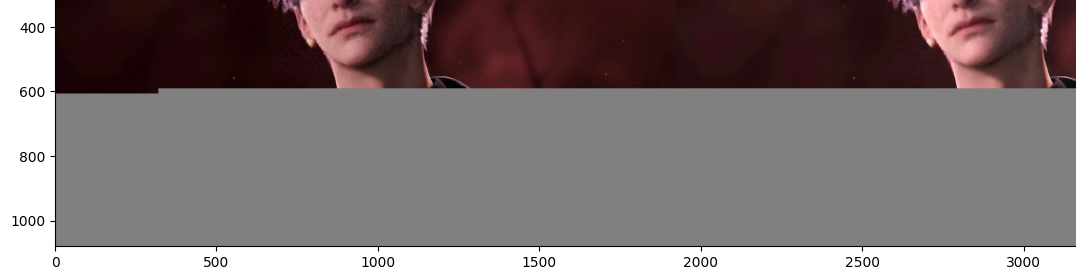

<Figure size 1600x600 with 0 Axes>

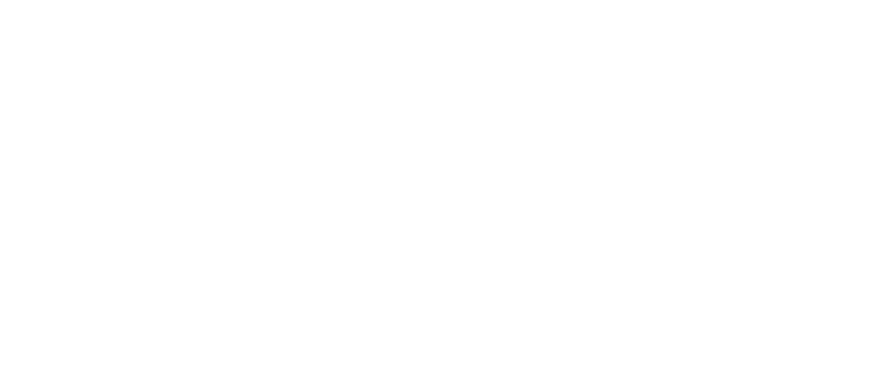

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

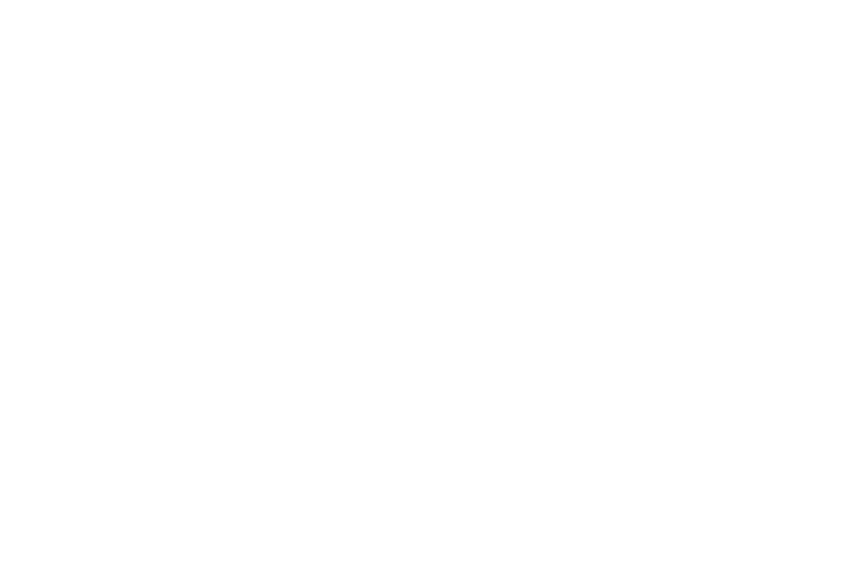

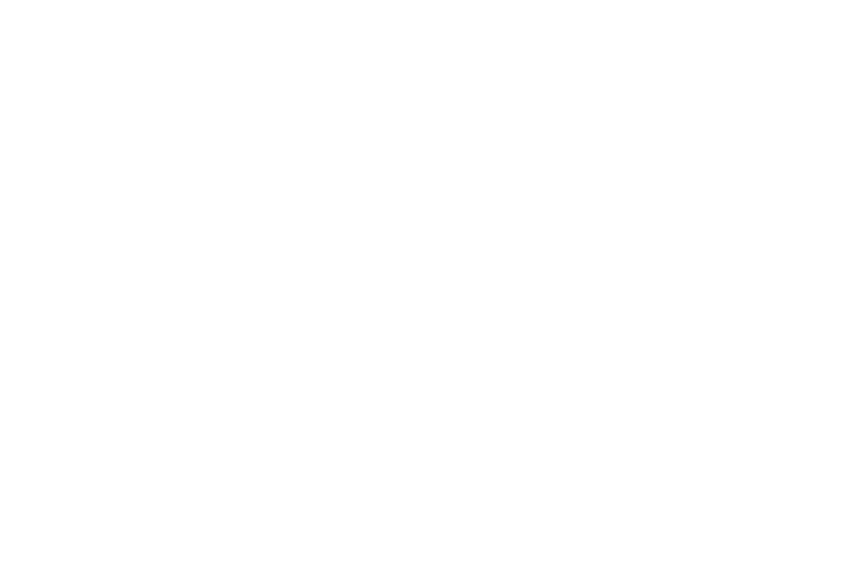

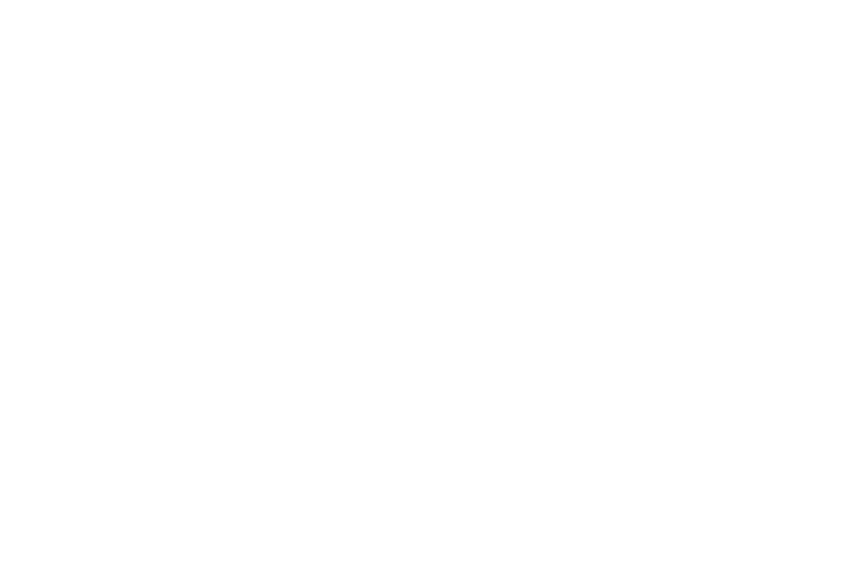

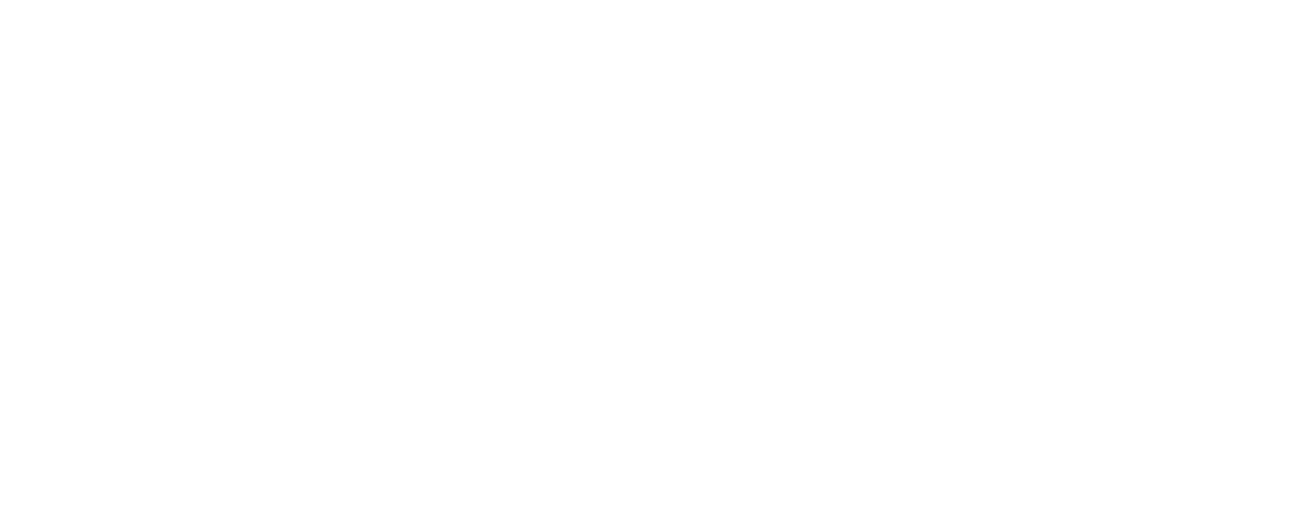

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

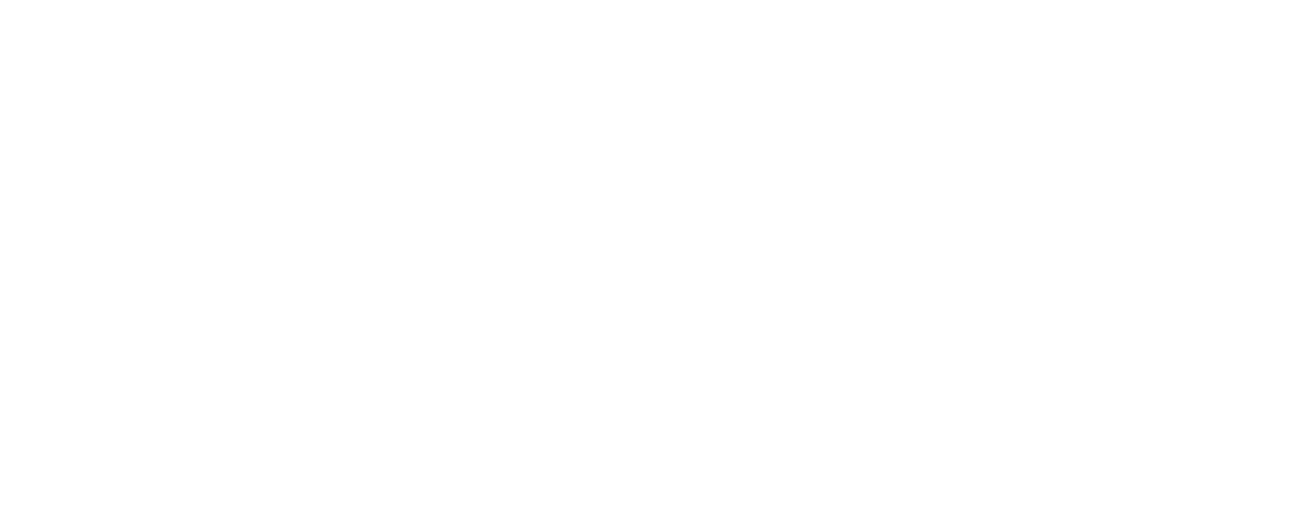

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

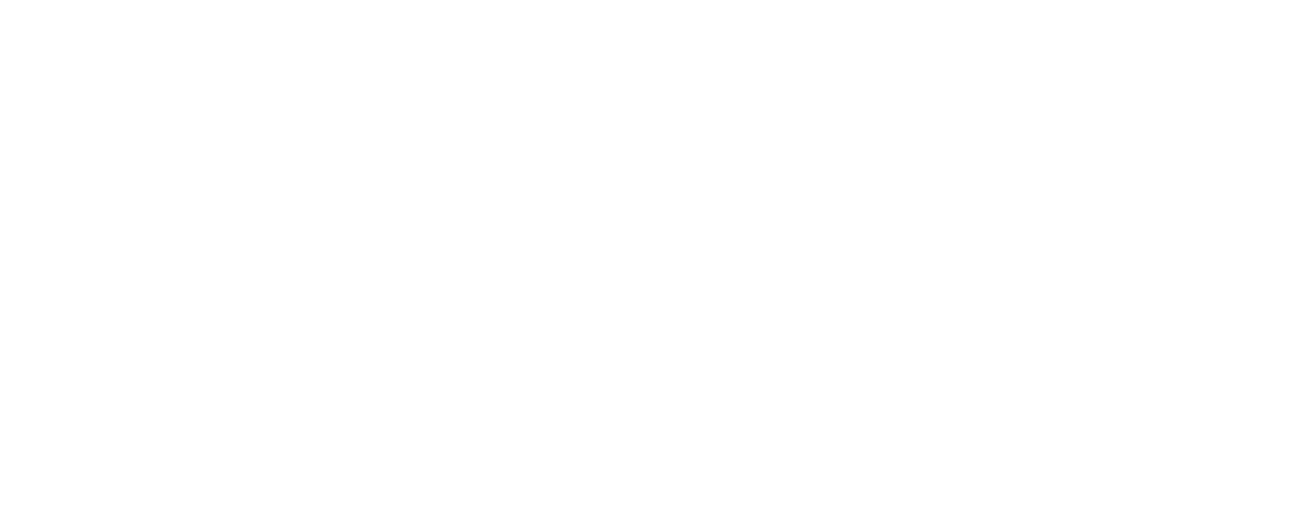

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

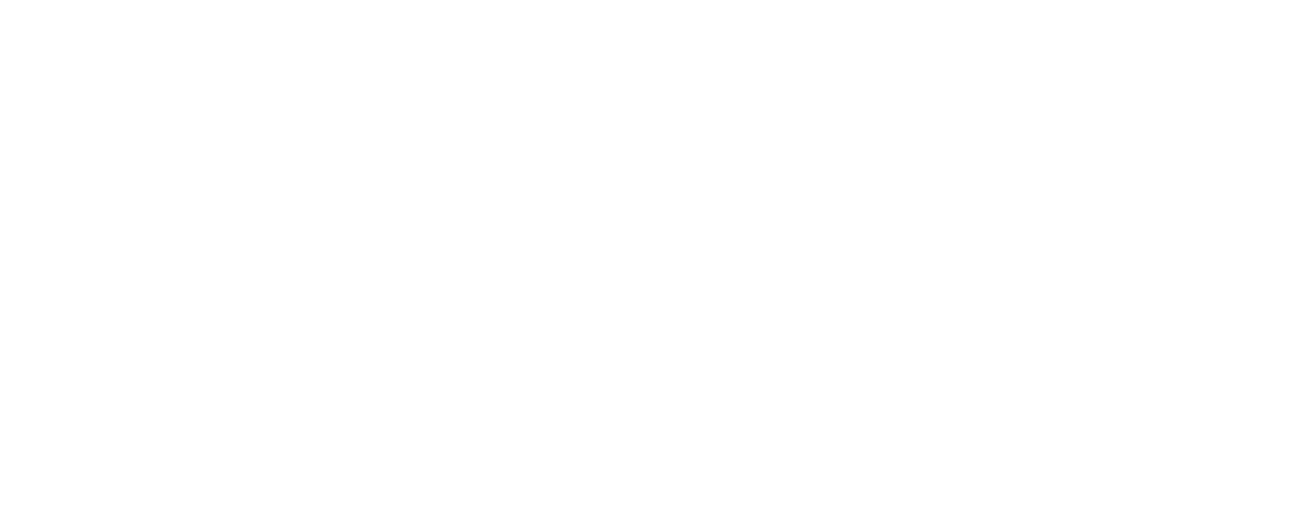

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

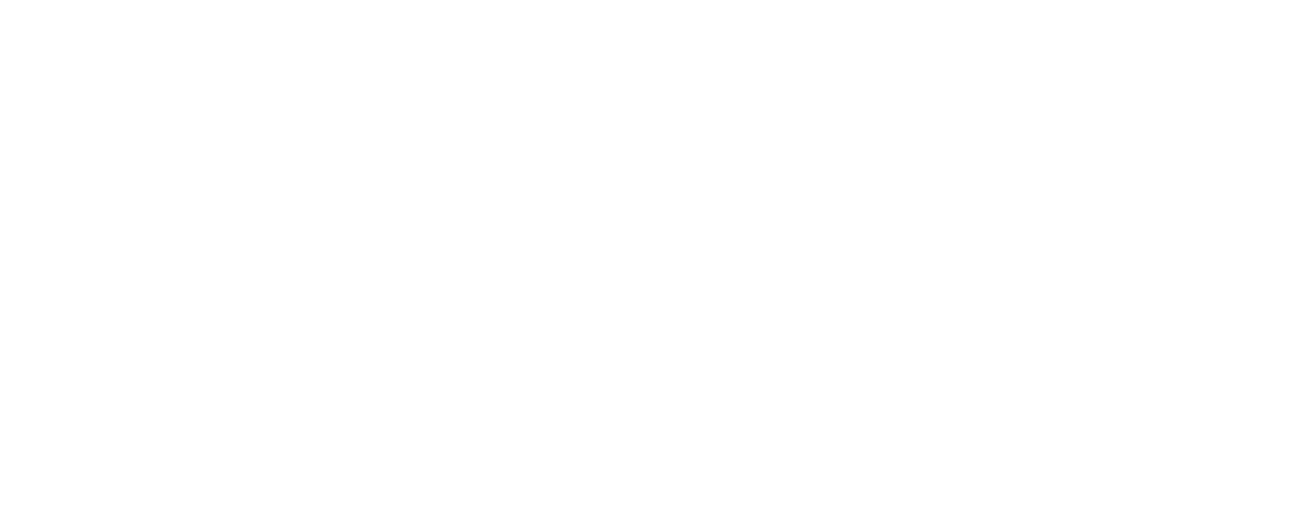

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

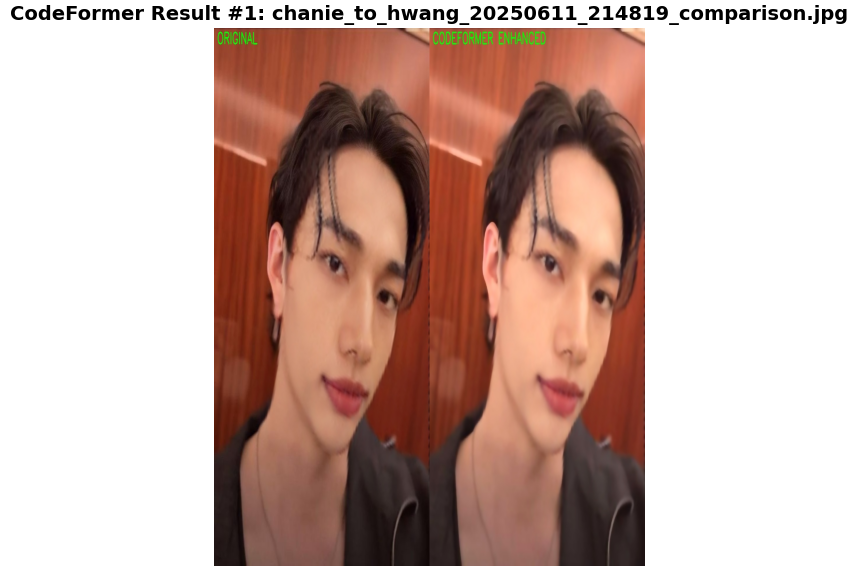

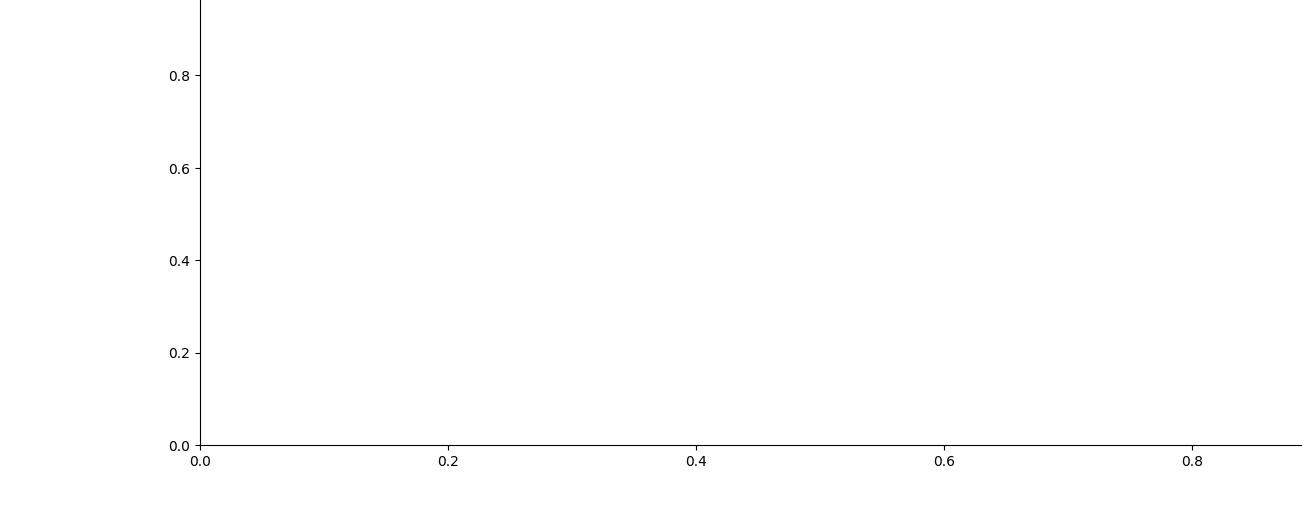

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

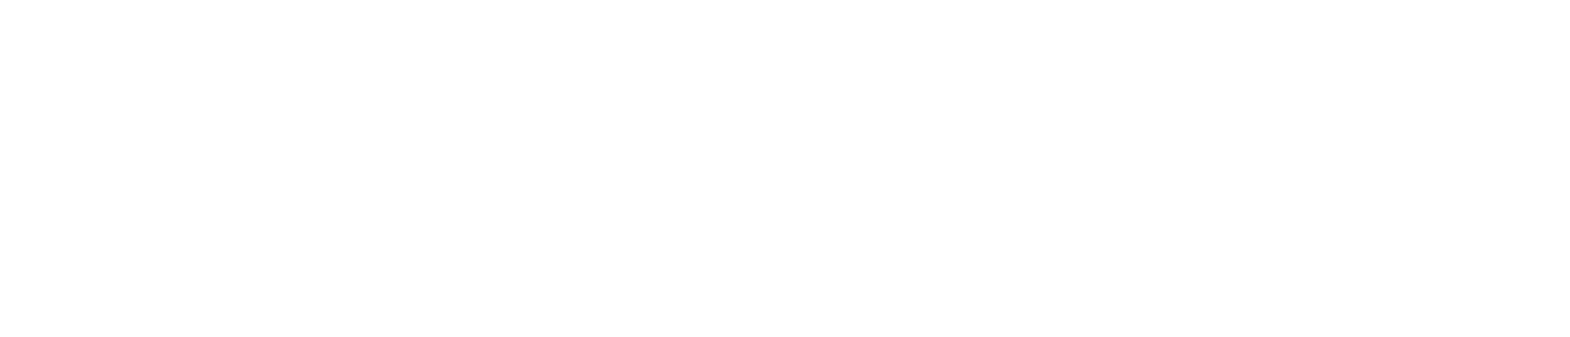

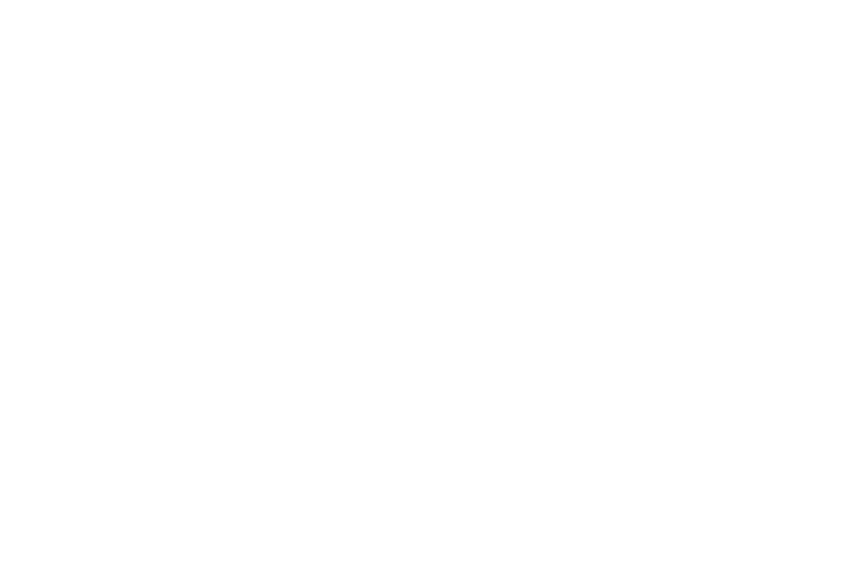

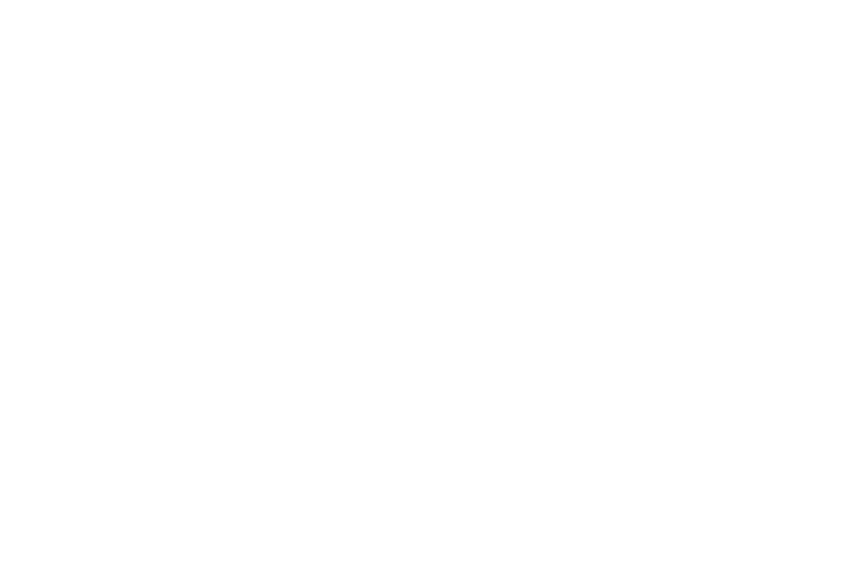

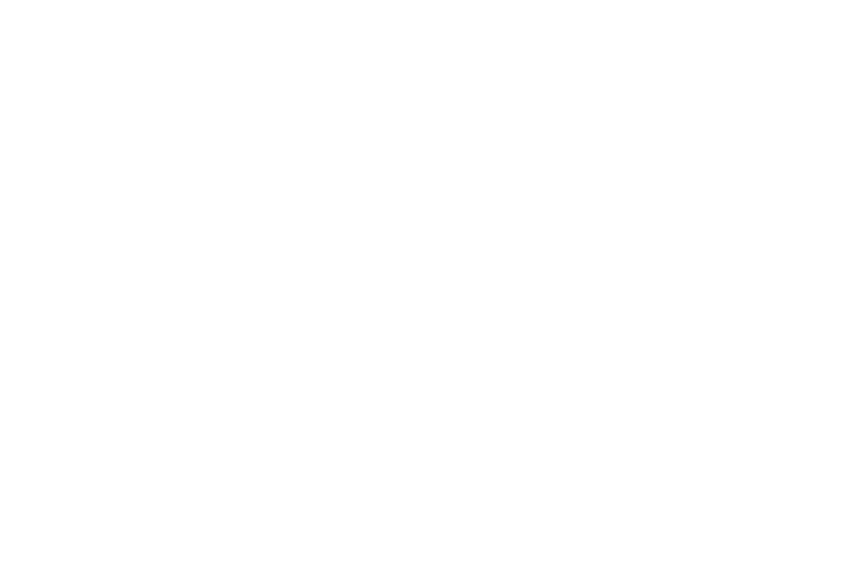

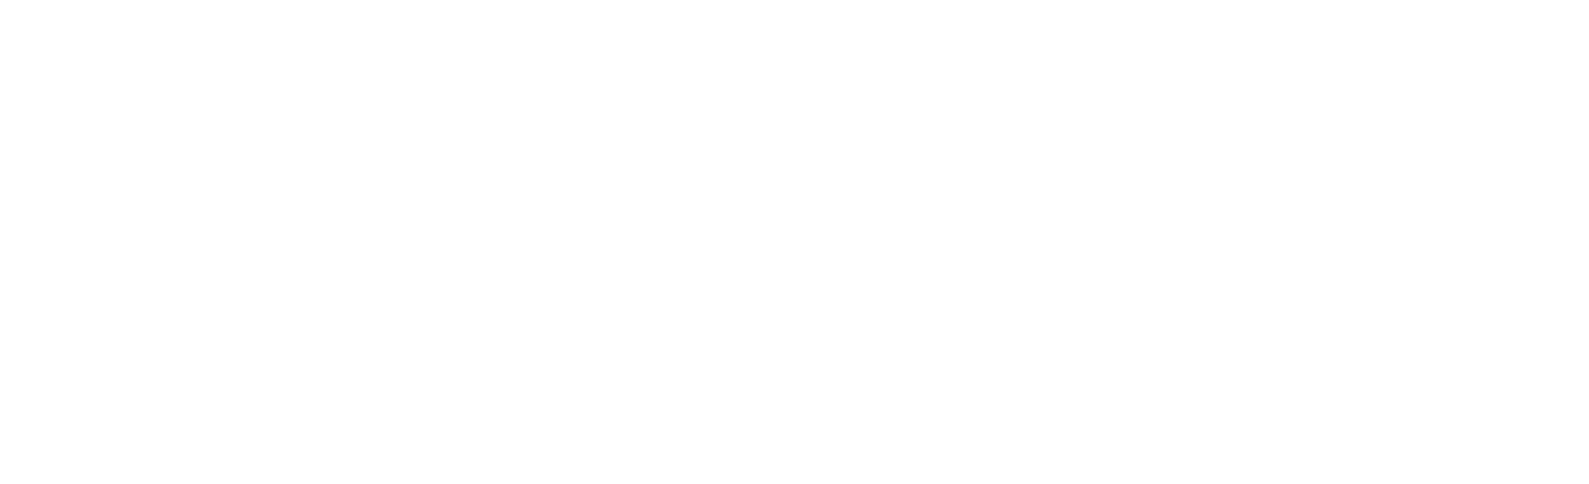

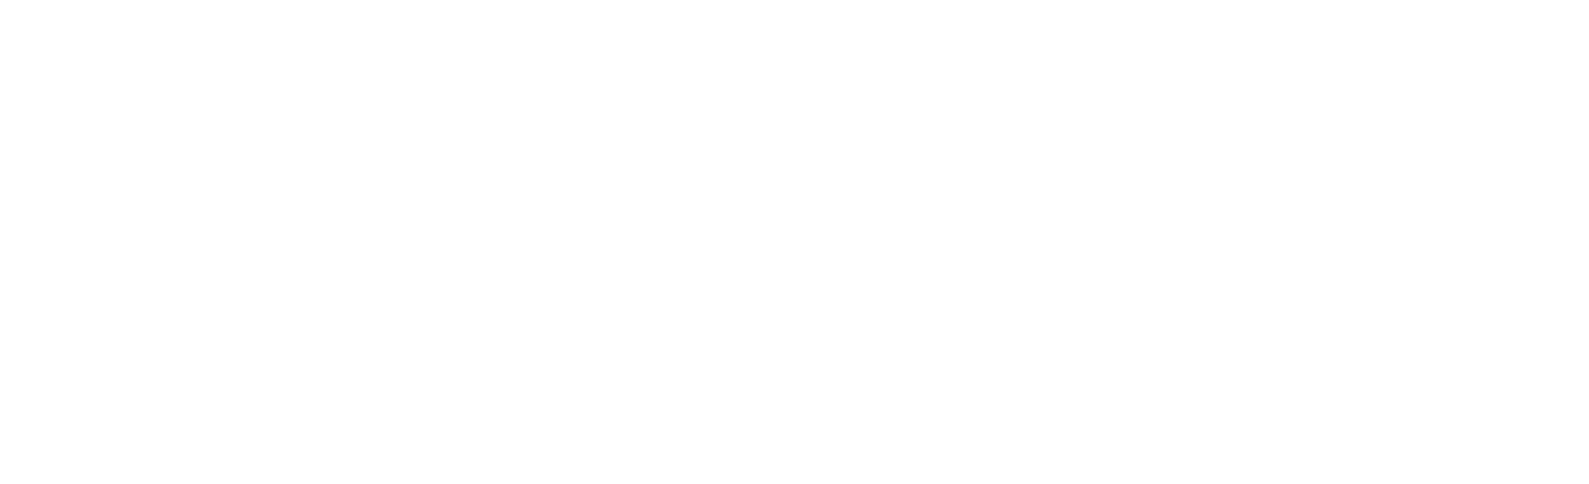

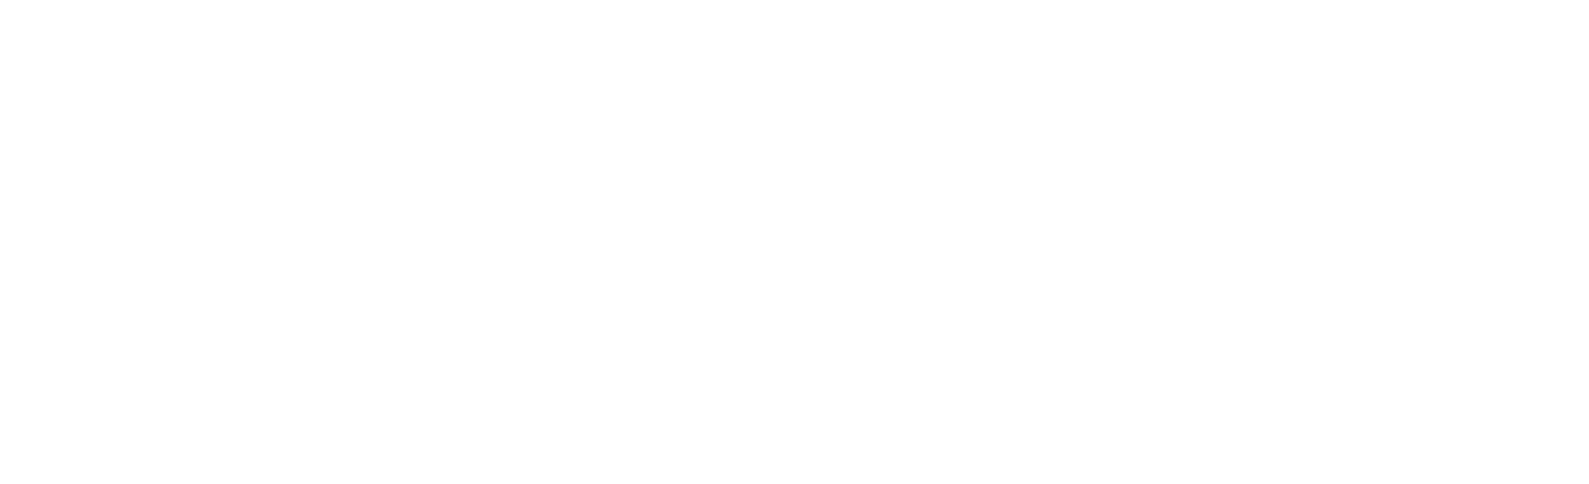

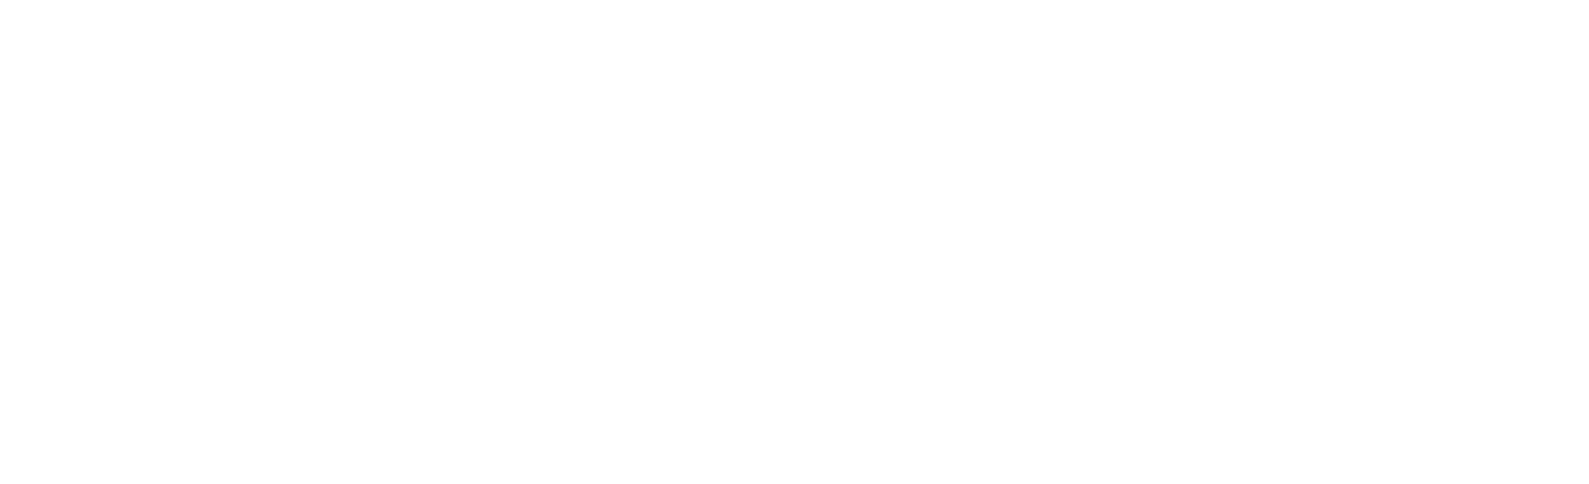

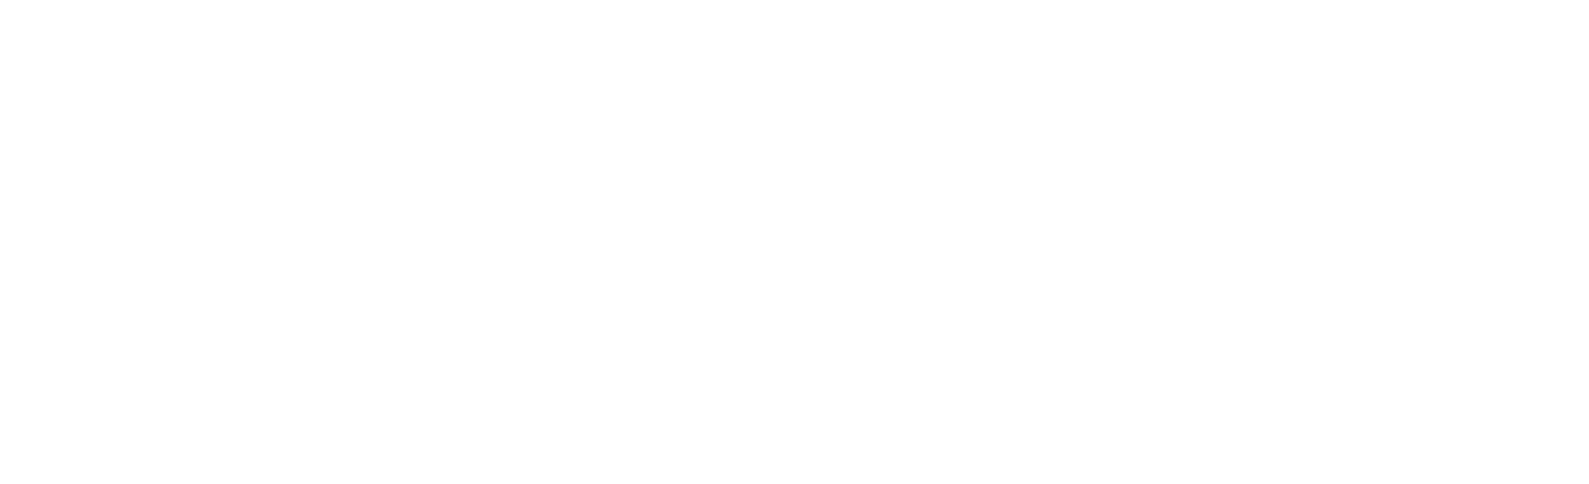

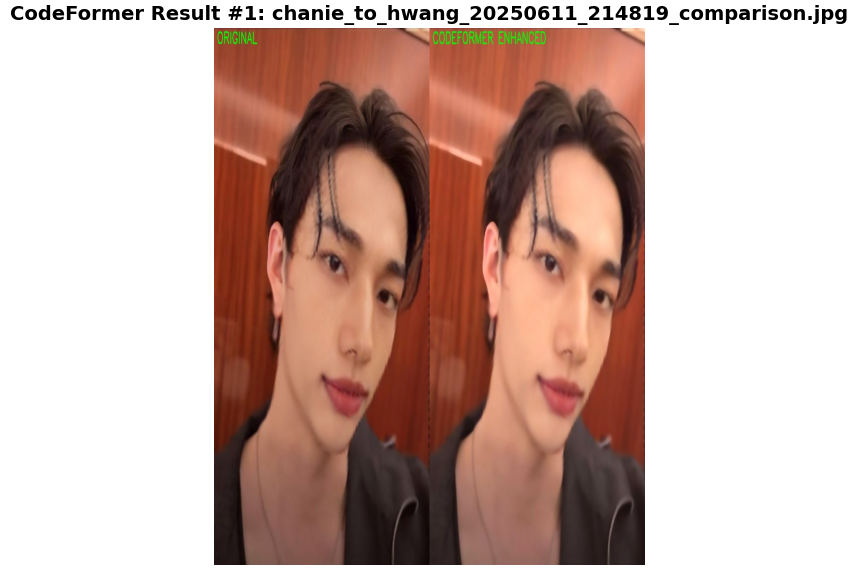

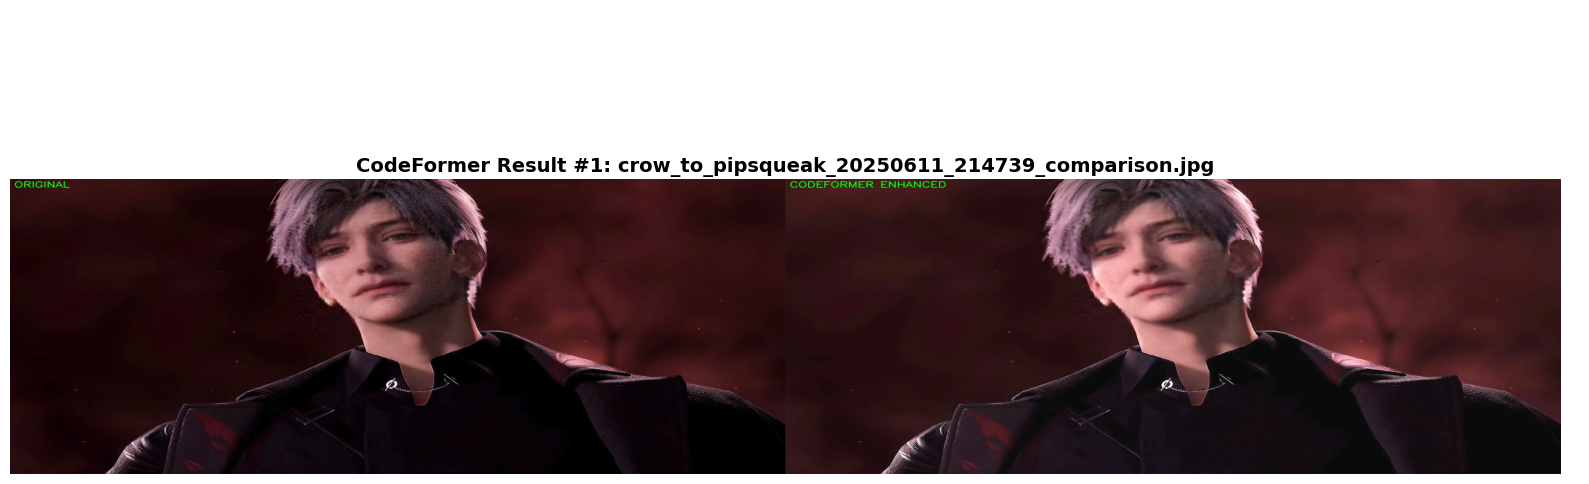


 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...
No new files to process
No new files to process


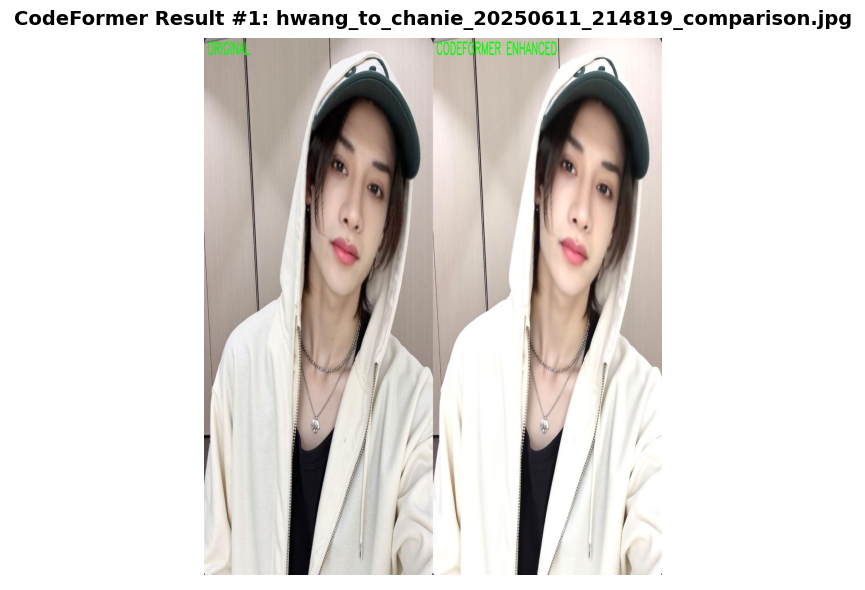

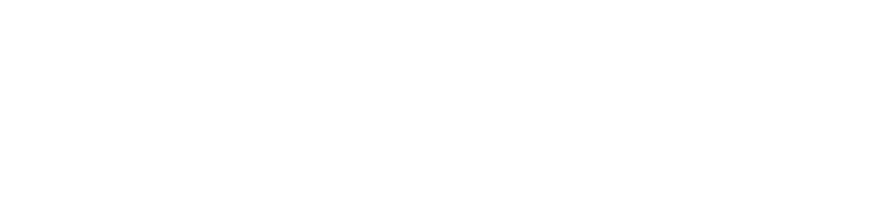

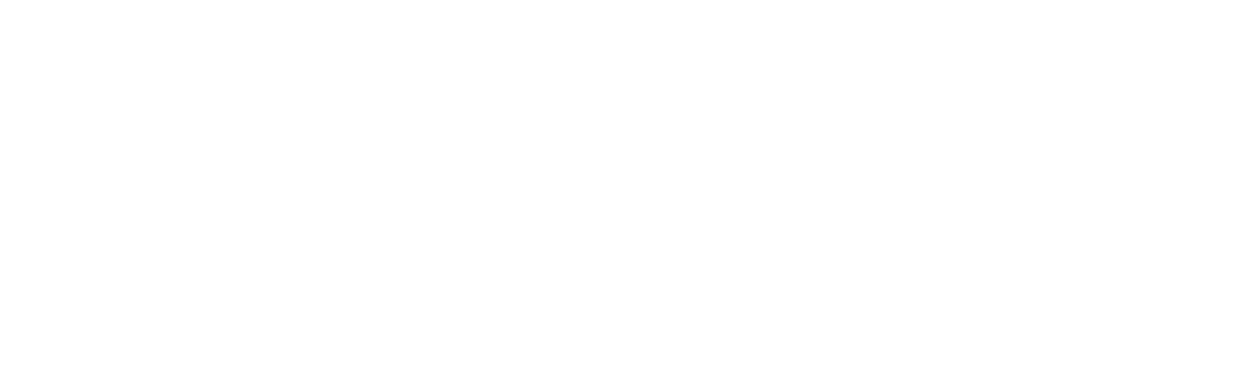

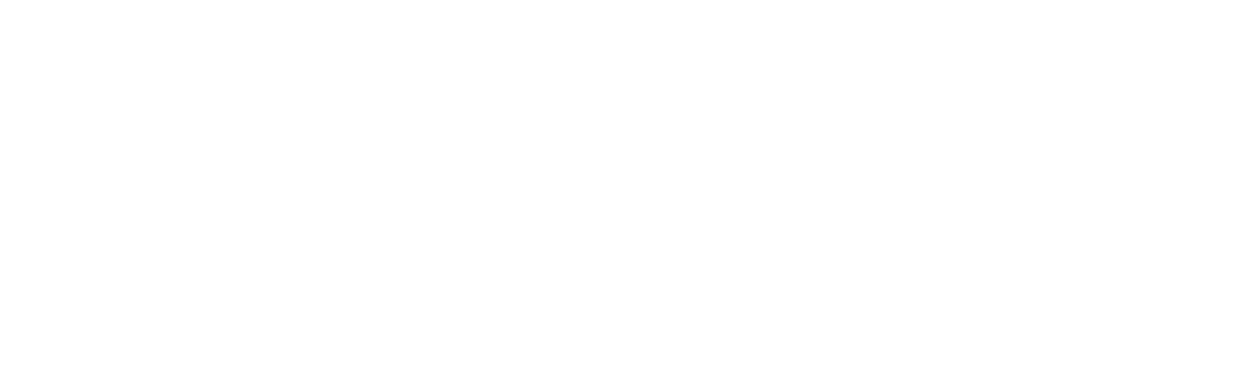

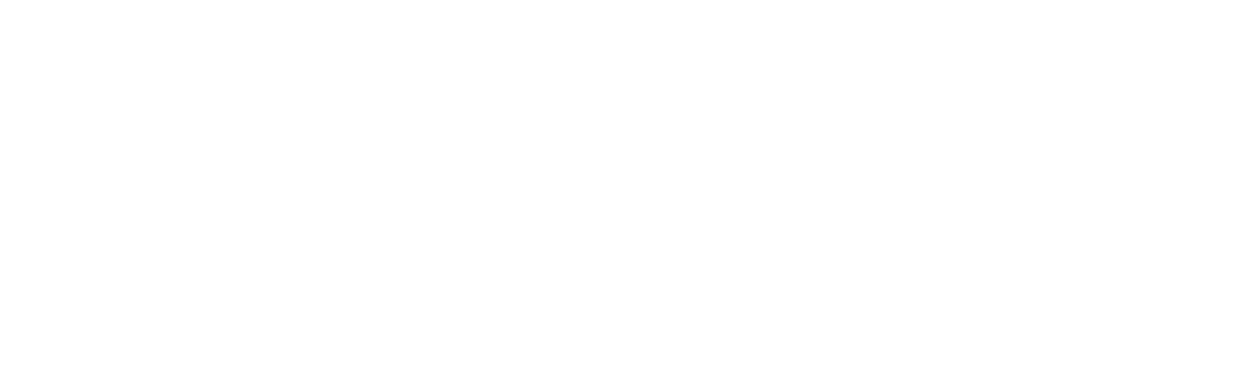

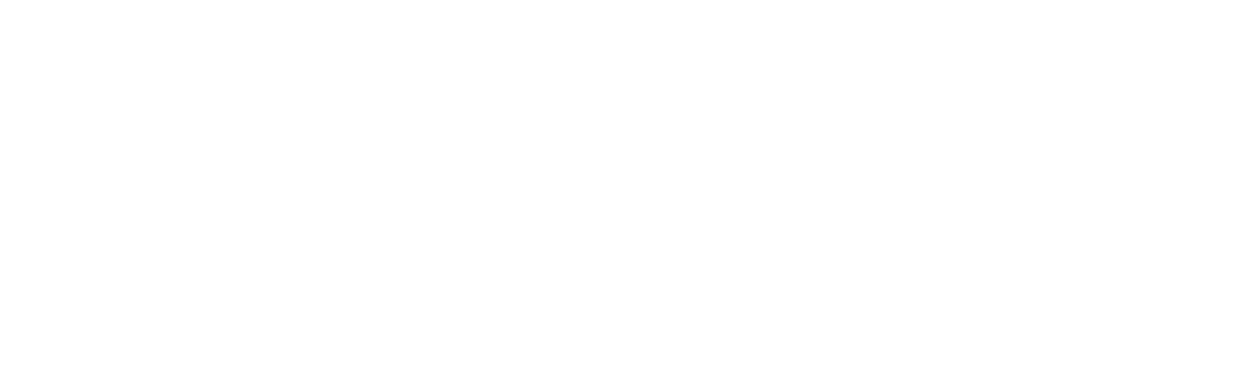

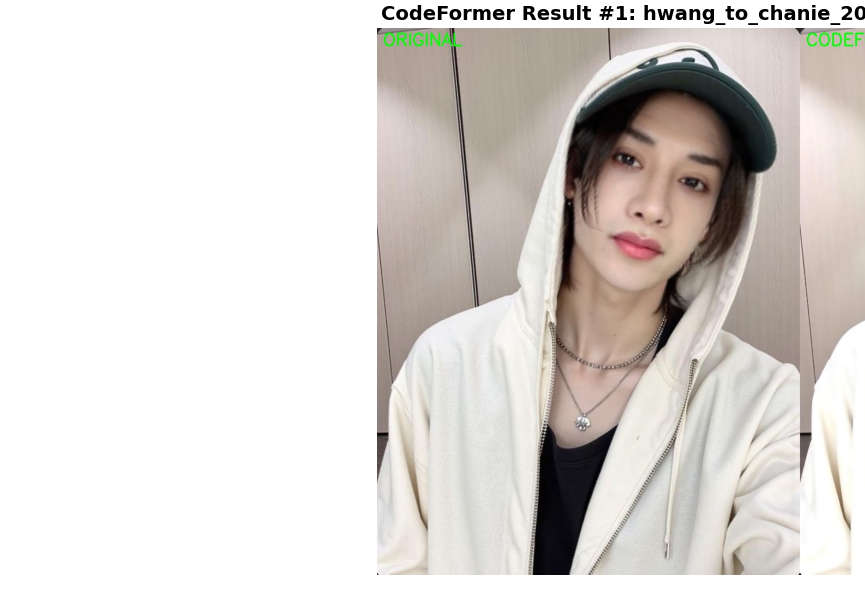

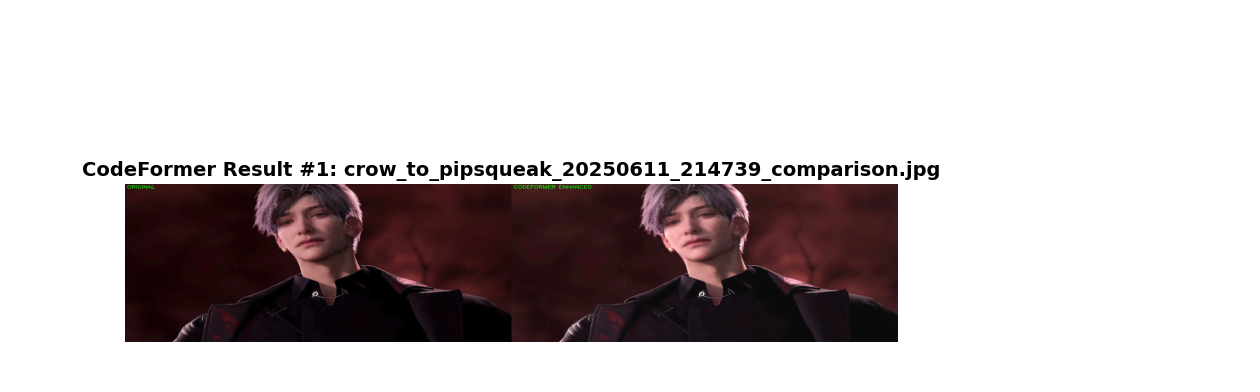

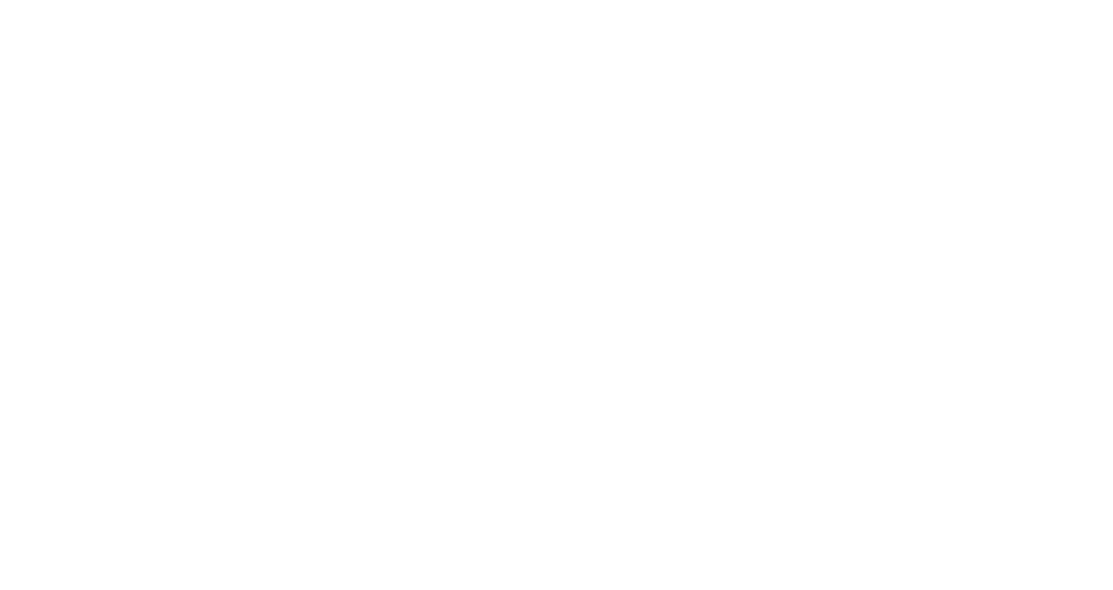

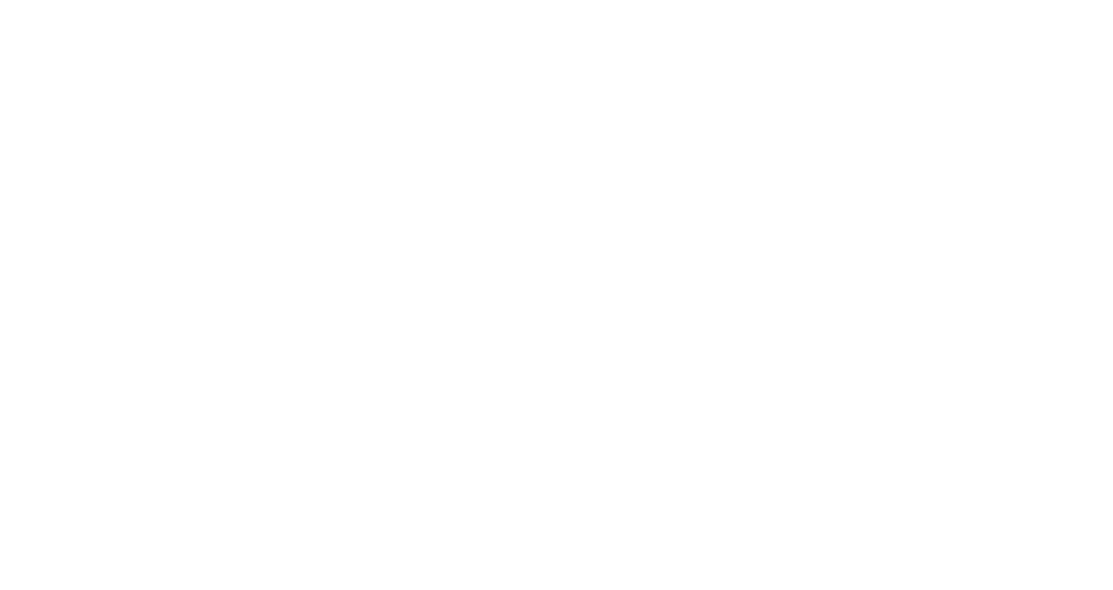

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

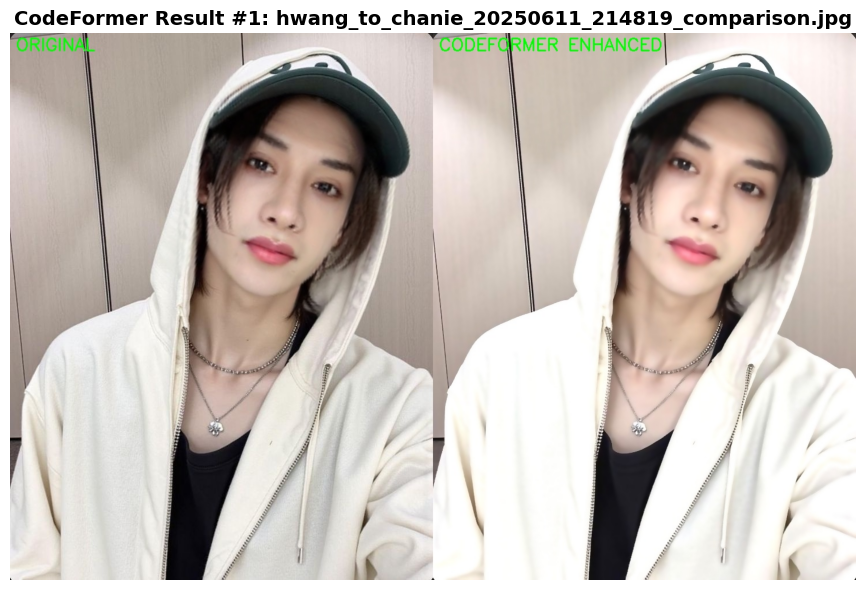

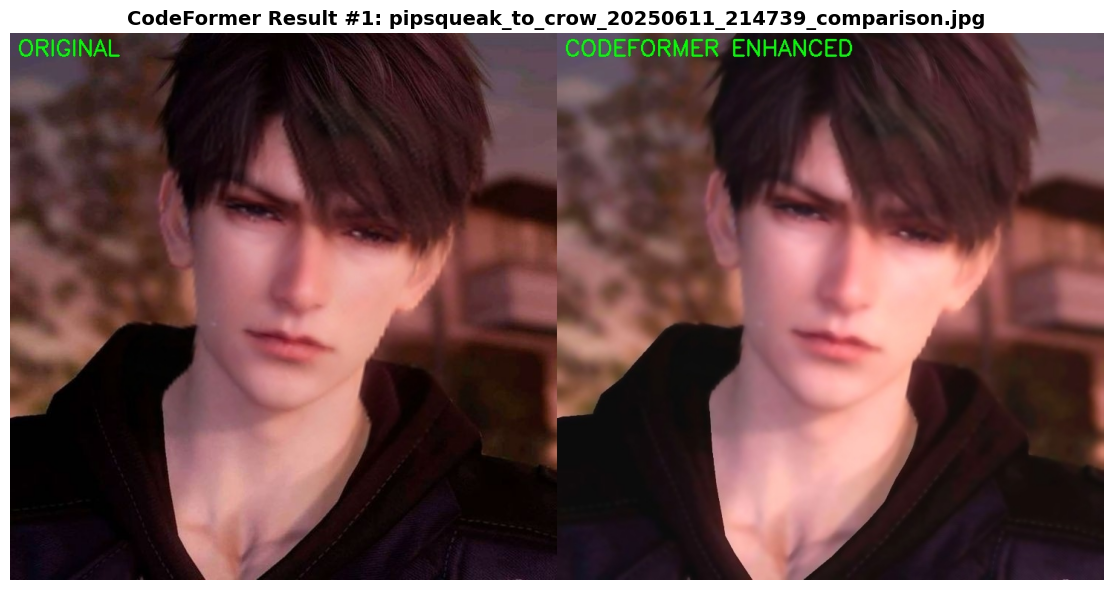

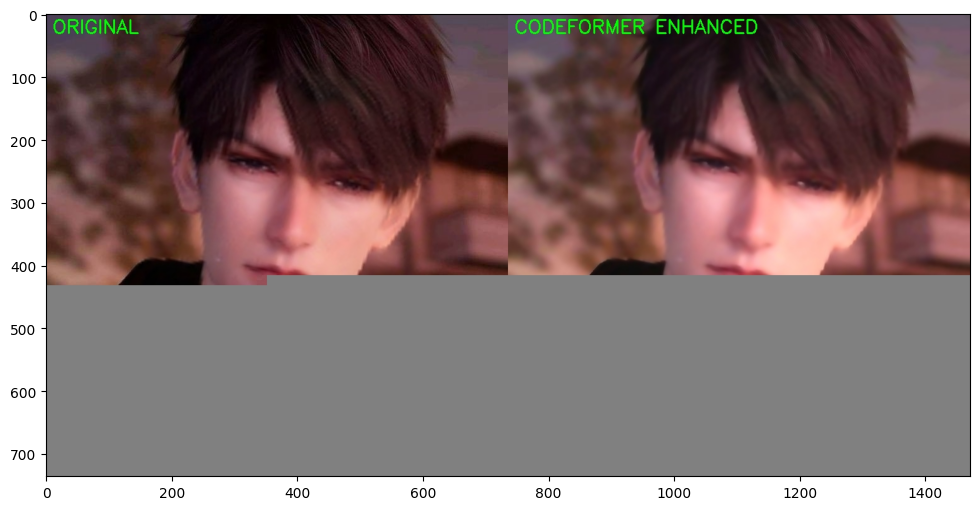

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

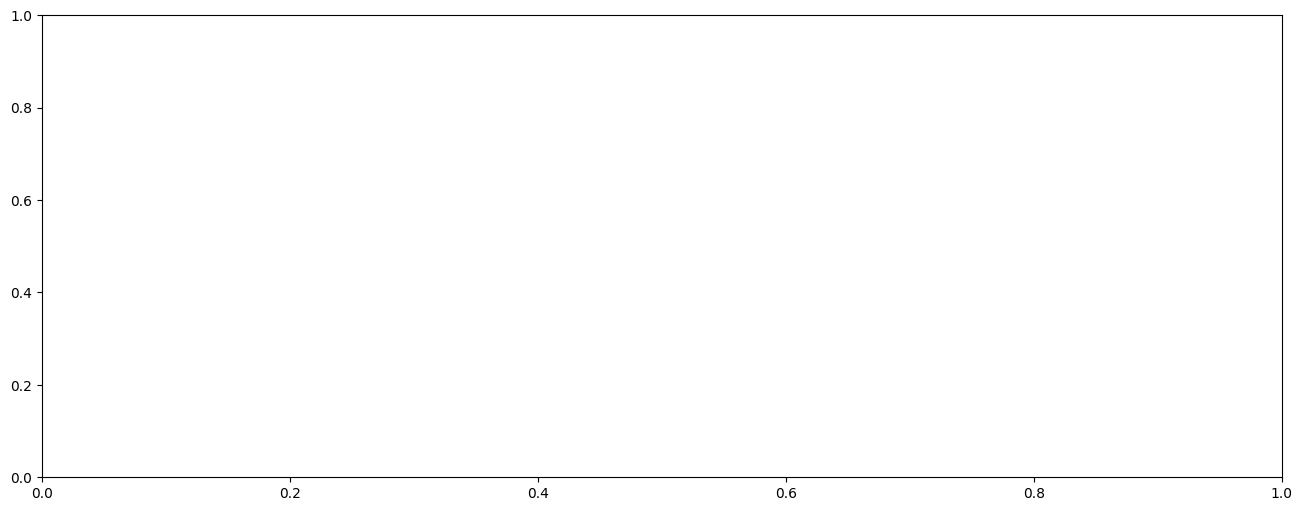

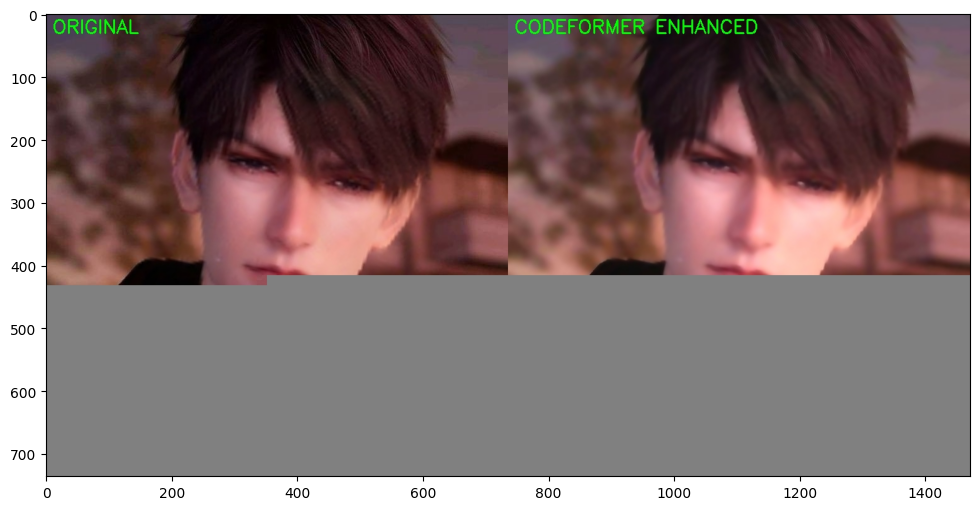

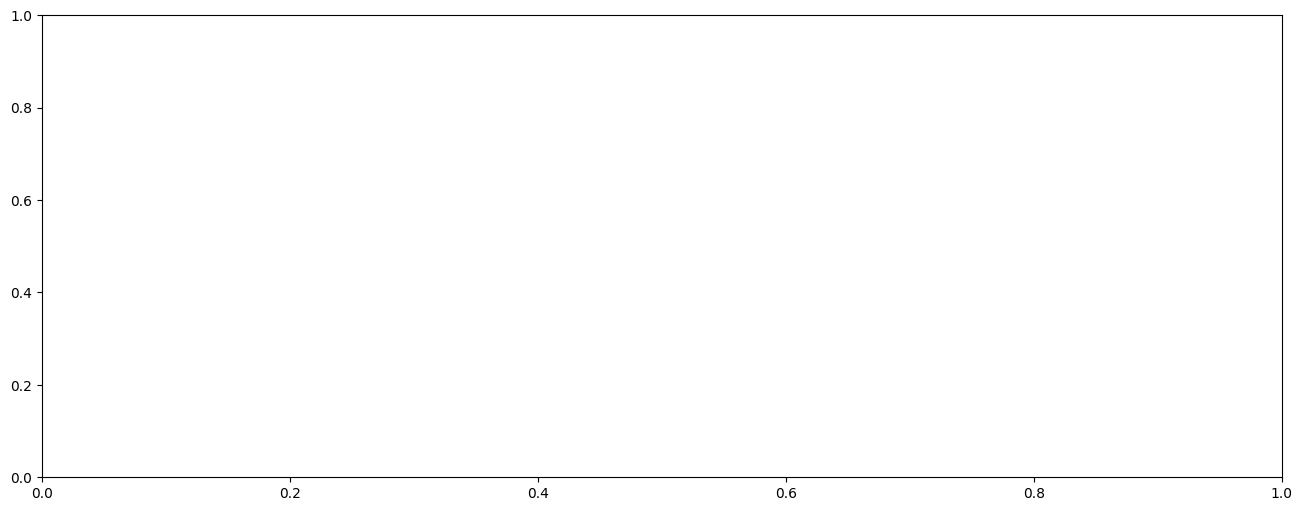

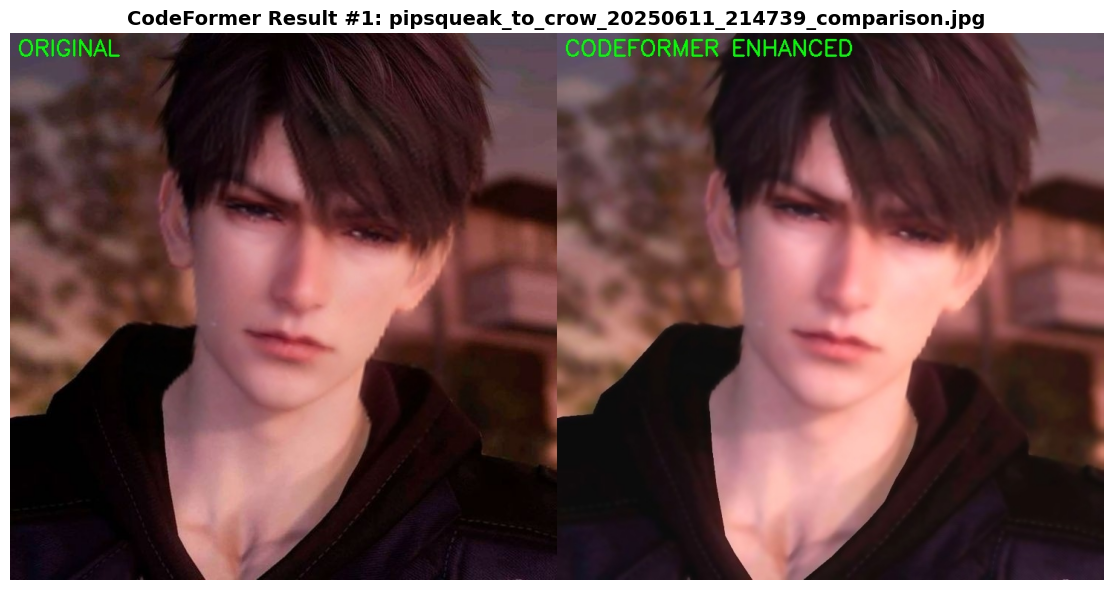

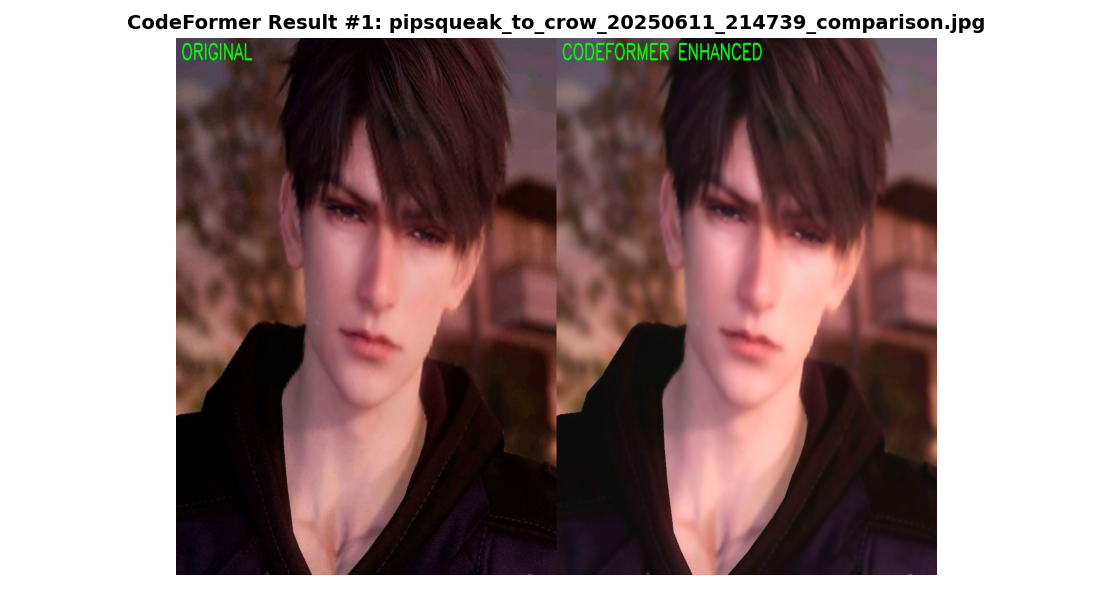


 New files detected! Starting CodeFormer processing...
 New files detected! Starting CodeFormer processing...
No new files to process

No new files to process

 New files detected! Starting CodeFormer processing...

 New files detected! Starting CodeFormer processing...
No new files to process
No new files to process


In [14]:
observer, processor = start_auto_processing()